# Create Environment

In [ ]:
from gym_marbic import *
import copy
from species_visualization import *

In [2]:
steps = 500

In [3]:
grid_size=50
n_species=10
carrying_capacity=25
disturbance=0.0
min_age=8
max_age=10
max_age_sort=False
lat_steep=0.1
disp_rate=0.45
n_corporations=3
n_investors=2
max_steps=1e6
half=True
birth_first=True
seed=42

## Companies do random actions

In [4]:
env = CorporateBiodiversityEnv(
    grid_size=grid_size,
    n_species=n_species,
    carrying_capacity=carrying_capacity,
    disturbance=disturbance,
    min_age=min_age,
    max_age=max_age,
    max_age_sort=max_age_sort,
    lat_steep=lat_steep,
    disp_rate=disp_rate,
    n_corporations=n_corporations,
    n_investors=n_investors,
    max_steps=max_steps,
    half=half,
    birth_first=birth_first,
    seed=seed
)

In [5]:
#get the observation information from reset
base_obs = env.reset()
list_cells_before = [copy.deepcopy(cell) for cell in env.list_cells]
# corporation: [corp.capital, corp.biodiversity_score, corp.resilience, mean_dist, mean_n_ind]
# investor: [cash, portfolio(Nc), corp_capitals(Nc), corp_biodiv(Nc)]

Max age array for each species: [10  8 10 10  8  8 10  9 10 10]
10/10 init species 0 (7679 ind.) 🌲

Before dynamics:


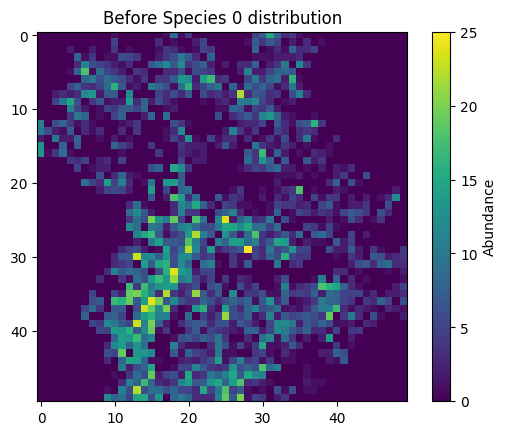

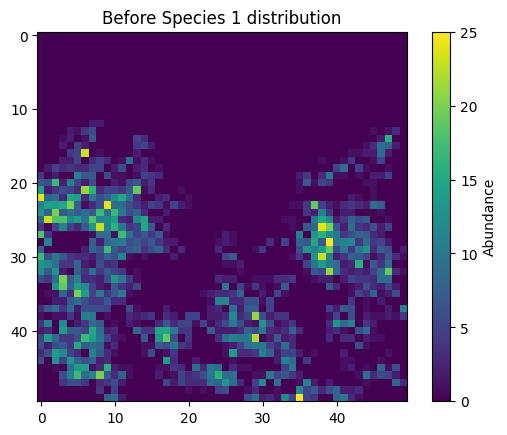

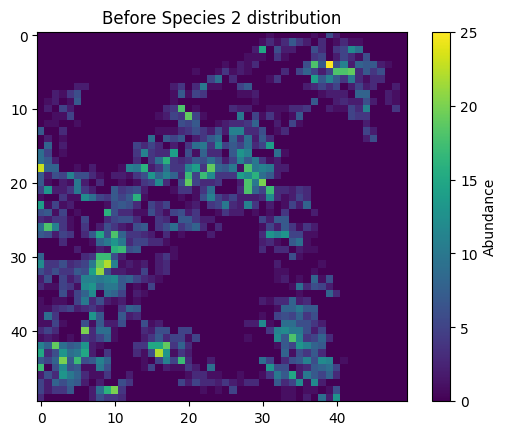

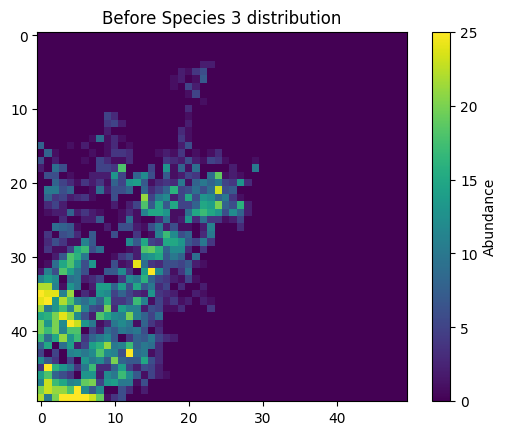

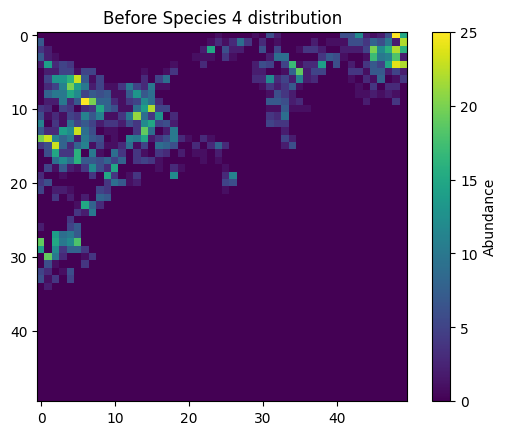

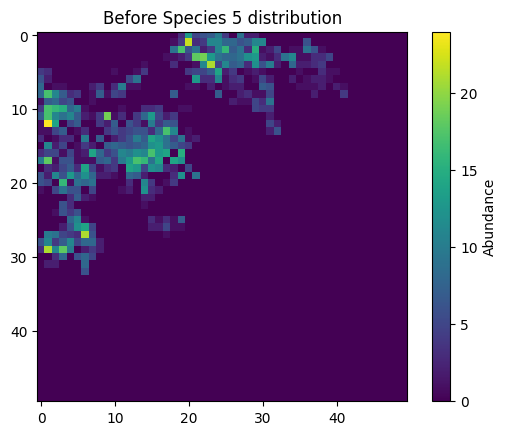

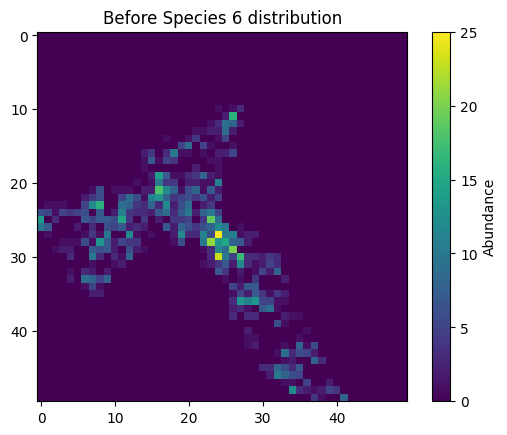

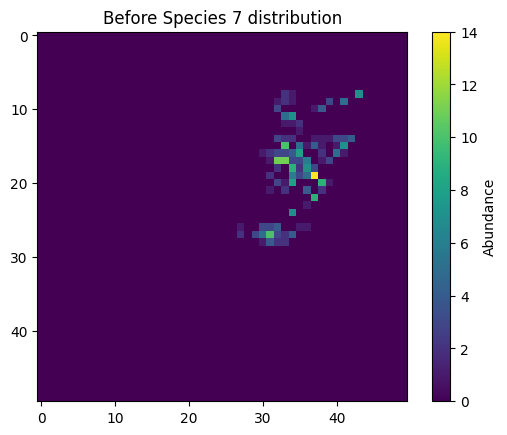

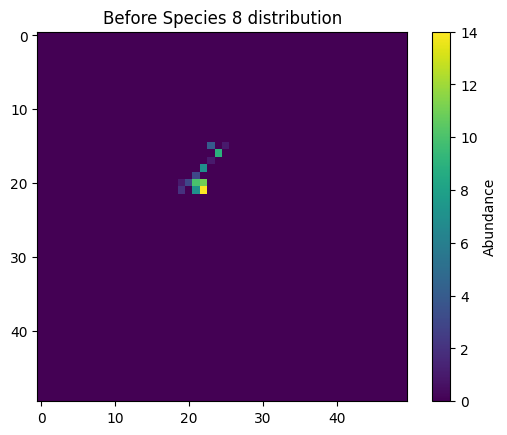

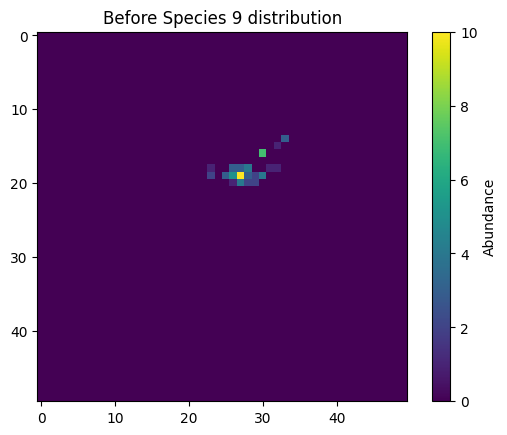

In [6]:
print("Before dynamics:")
for sp_id in range(env.n_species):
    plot_species_distribution(list_cells_before, env.grid_size, sp_id, title_prefix="Before")

In [7]:
# check total number of individuals before and after dynamics
# make a copy of the list_cells to compare before and after
print("Before dynamics:")
sum_before = sum(cell.n_individuals for cell in list_cells_before)
print(f"Total individuals: {sum_before}")

Before dynamics:
Total individuals: 31250


[DEBUG] Initial available_space: [25 25 25 ... 25 25 25]
[DEBUG] births count: 31250
Step 1/1000000
Corp 0: capital=148.70, biodiv=1.000, resilience=0.050
Corp 1: capital=111.14, biodiv=1.100, resilience=0.000
Corp 2: capital=133.17, biodiv=1.100, resilience=0.000
Investor 0: cash=0.00, portfolio=[0.51698968 0.13135239 0.35165794]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.000, max: 0.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62497
Step 2/1000000
Corp 0: capital=143.70, biodiv=1.010, resilience=0.050
Corp 1: capital=106.14, biodiv=1.110, resilience=0.000
Corp 2: capital=158.17, biodiv=1.080, resilience=0.000
Investor 0: cash=0.00, portfolio=[0.51698968 0.13135239 0.35165794]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.002, max: 15.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62493
Step 3/1000000
Corp 0: capital=182.74, biodiv=1.010, resilience=0.050
Corp 1: capital=14

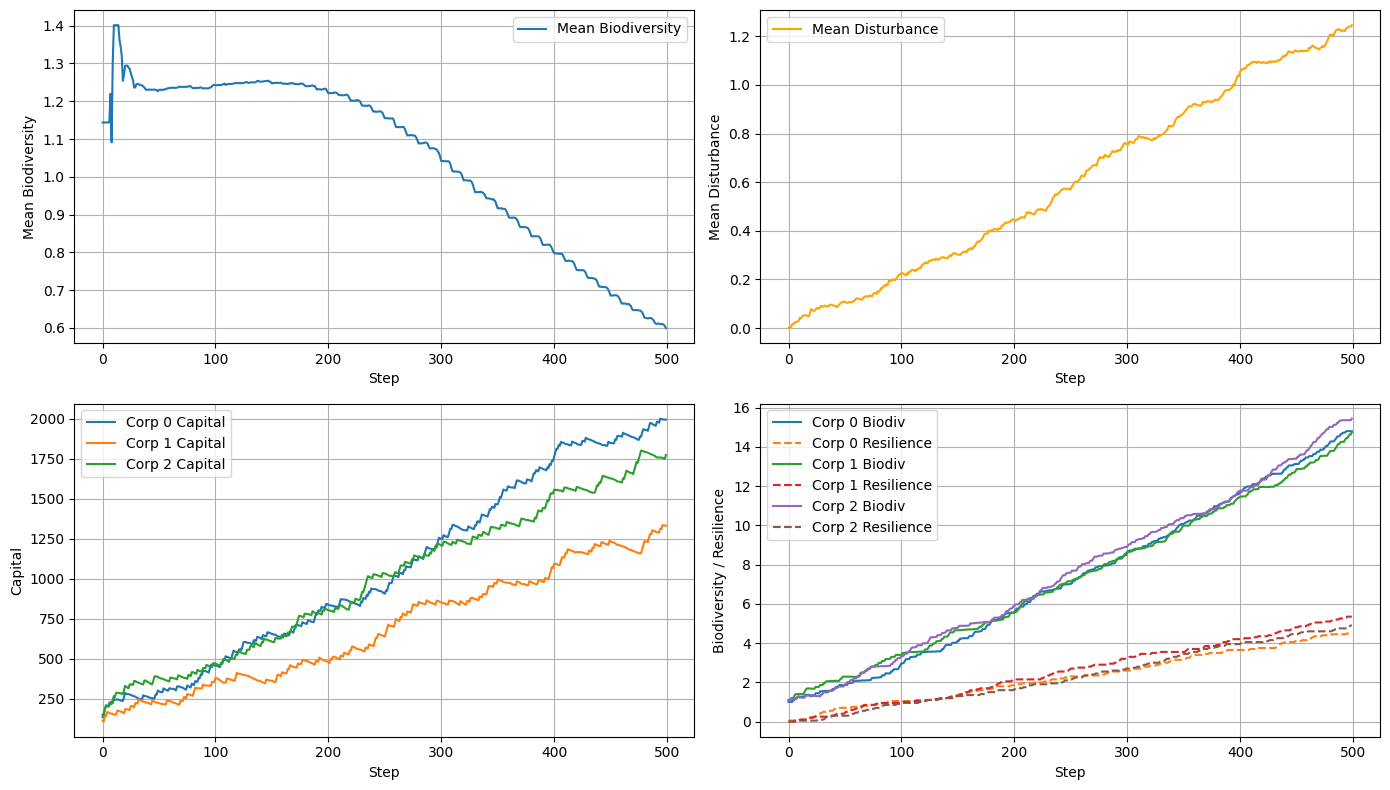

In [8]:
# record historydata
mean_biodiv_history = []
mean_disturbance_history = []

# add new：corporate attribute history
corp_capital_history = [[] for _ in range(env.n_corporations)]
corp_biodiv_history = [[] for _ in range(env.n_corporations)]
corp_resilience_history = [[] for _ in range(env.n_corporations)]

for t in range(steps):
    actions = {}
    for aid in env.agent_ids:
            actions[aid] = env.action_spaces[aid].sample()
            # gym's Dict sample returns e.g. numpy types; convert to python types if needed
            if isinstance(actions[aid], dict) and "weights" in actions[aid]:
                actions[aid]["weights"] = np.array(actions[aid]["weights"], dtype=float)
    obs, rewards, dones, infos = env.step(actions)
    env.render()
    # record history
    mean_biodiv_history.append(env._get_mean_biodiversity())
    mean_disturbance_history.append(env._get_mean_disturbance())
    for i, corp in enumerate(env.corporations):
        corp_capital_history[i].append(corp.capital)
        corp_biodiv_history[i].append(corp.biodiversity_score)
        corp_resilience_history[i].append(corp.resilience)
    if all(dones.values()):
        break

# plot trend chart
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(mean_biodiv_history, label="Mean Biodiversity")
plt.xlabel("Step")
plt.ylabel("Mean Biodiversity")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(mean_disturbance_history, label="Mean Disturbance", color='orange')
plt.xlabel("Step")
plt.ylabel("Mean Disturbance")
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
for i in range(env.n_corporations):
    plt.plot(corp_capital_history[i], label=f"Corp {i} Capital")
plt.xlabel("Step")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
for i in range(env.n_corporations):
    plt.plot(corp_biodiv_history[i], label=f"Corp {i} Biodiv")
    plt.plot(corp_resilience_history[i], '--', label=f"Corp {i} Resilience")
plt.xlabel("Step")
plt.ylabel("Biodiversity / Resilience")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

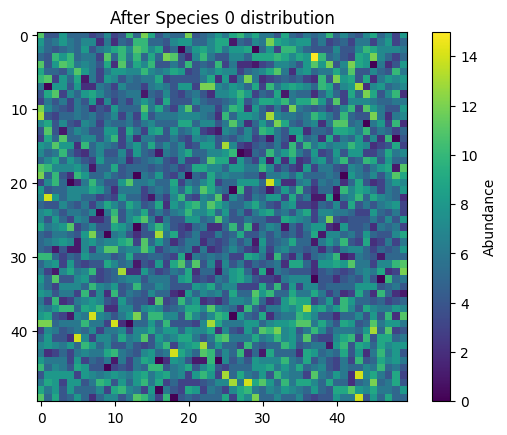

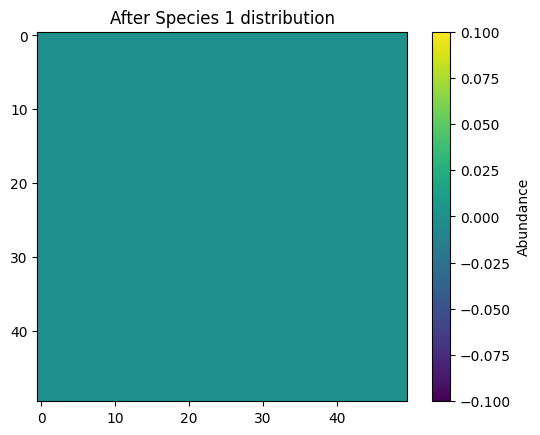

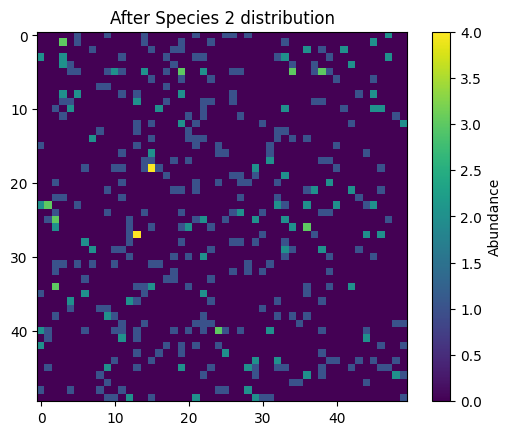

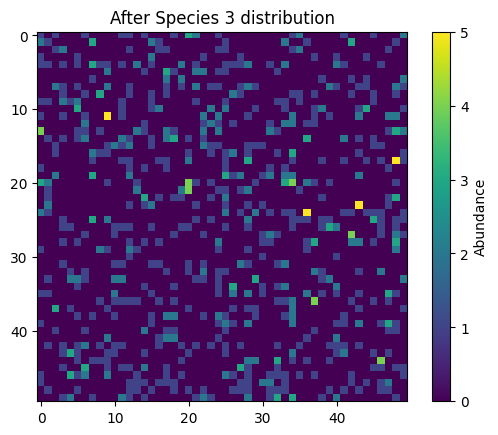

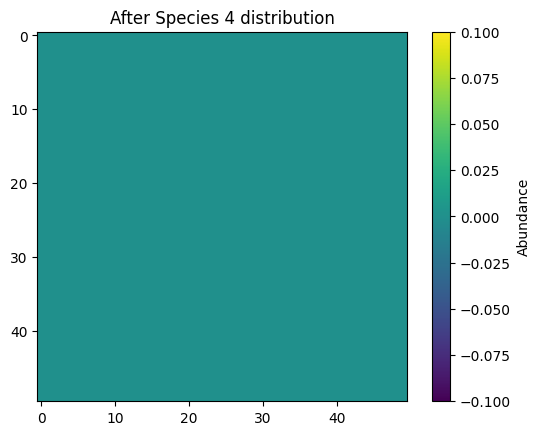

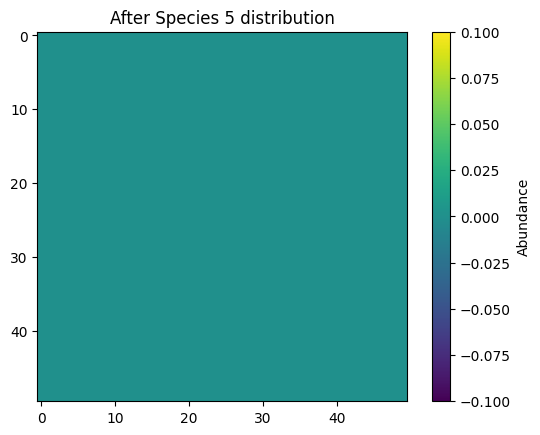

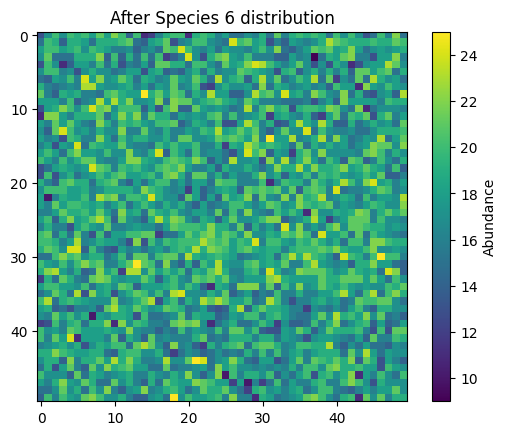

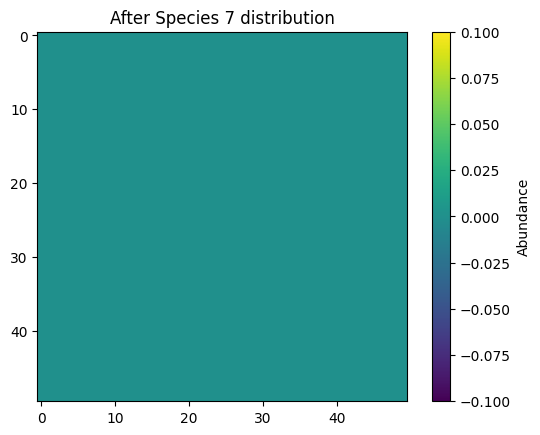

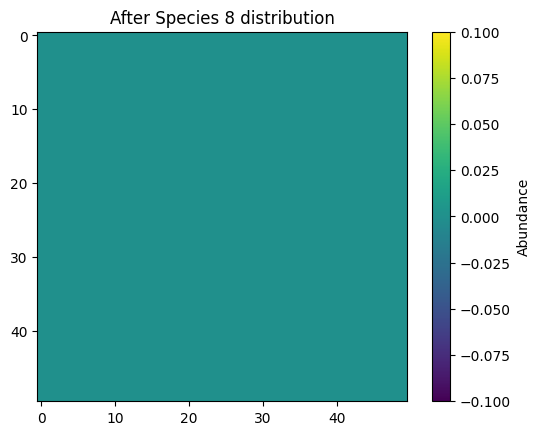

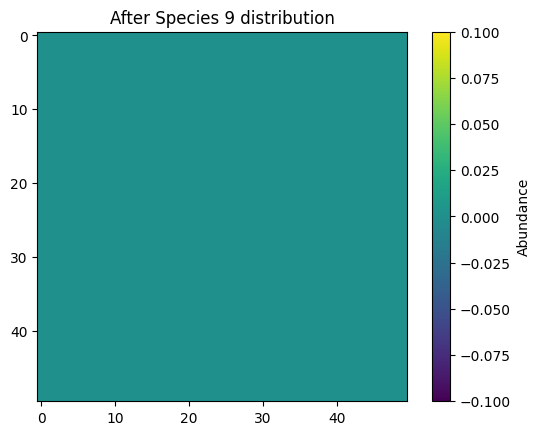

In [9]:
for sp_id in range(env.n_species):
    plot_species_distribution(env.list_cells, env.grid_size, sp_id, title_prefix="After")

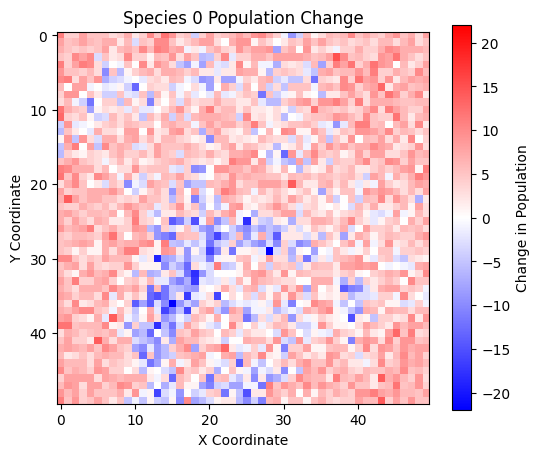

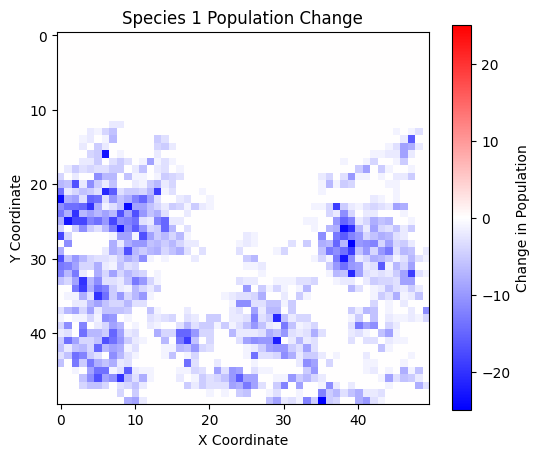

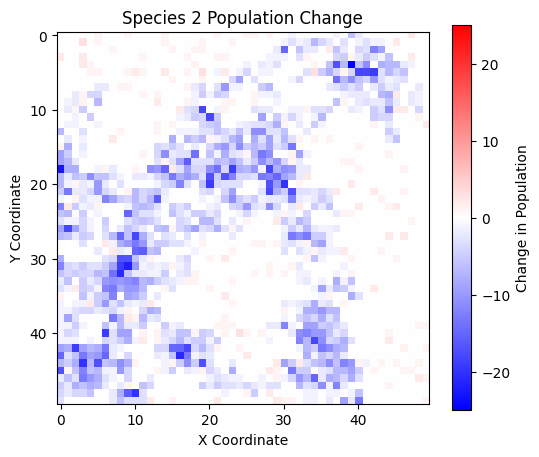

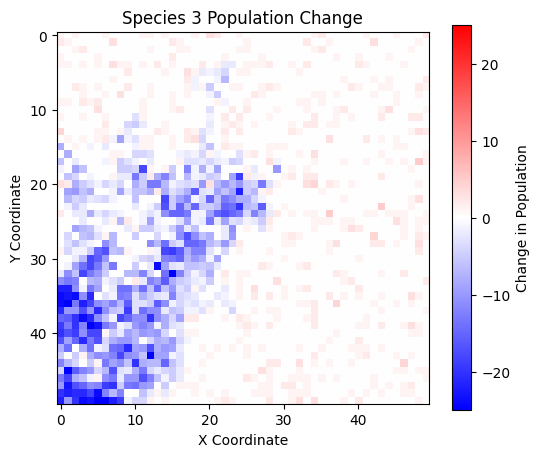

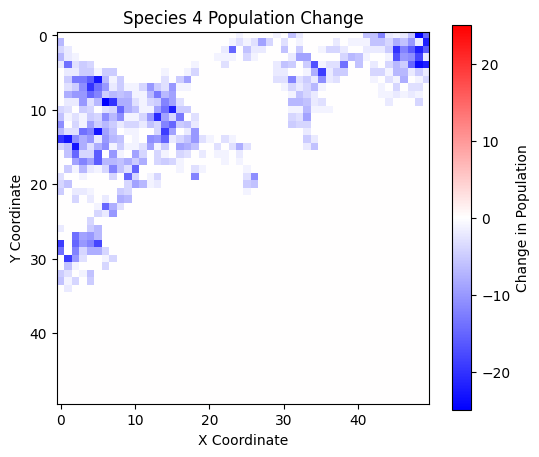

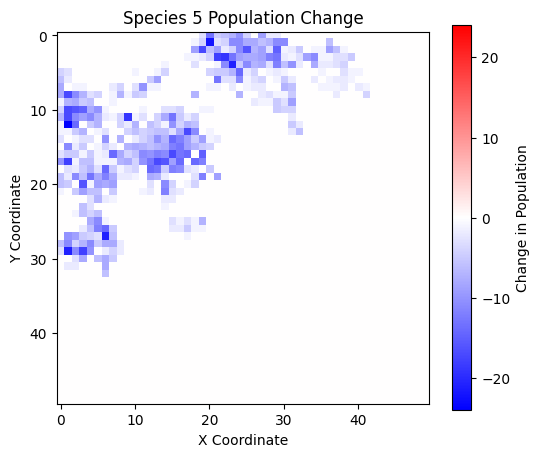

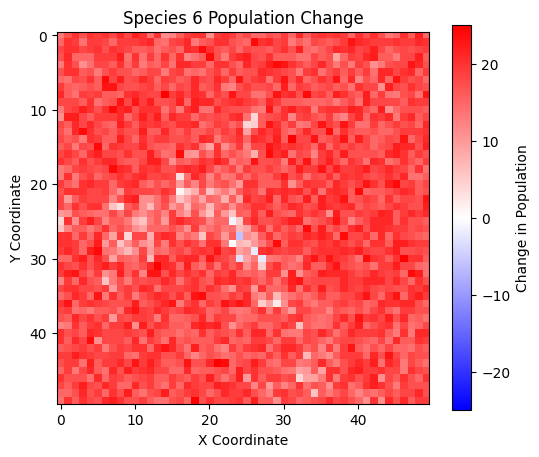

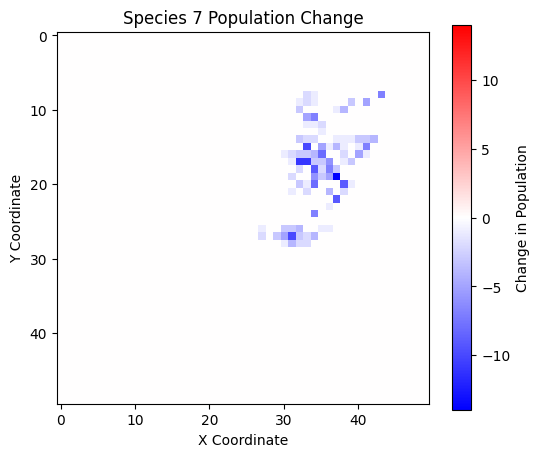

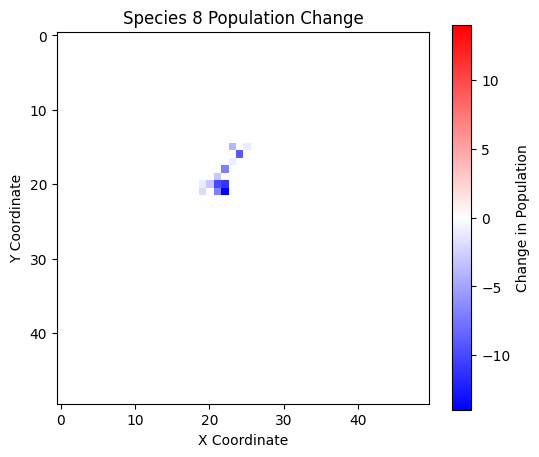

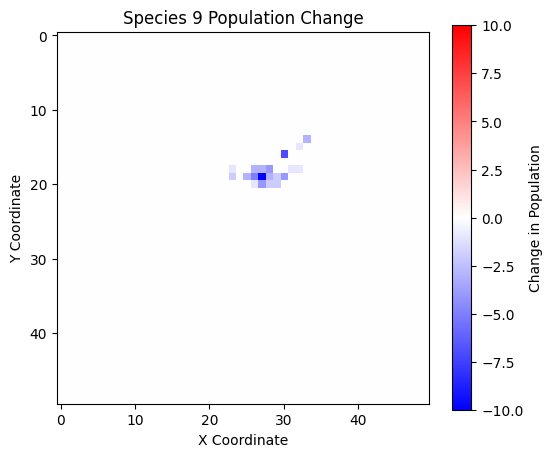

In [10]:
for sp_id in range(env.n_species):
    plot_species_difference(list_cells_before, env.list_cells, species_id=sp_id)

In [11]:
print("\nAfter dynamics:")
#check total number of individuals after dynamics
sum_after = sum(cell.n_individuals for cell in env.list_cells)
print(f"Total individuals: {sum_after}")


After dynamics:
Total individuals: 61528


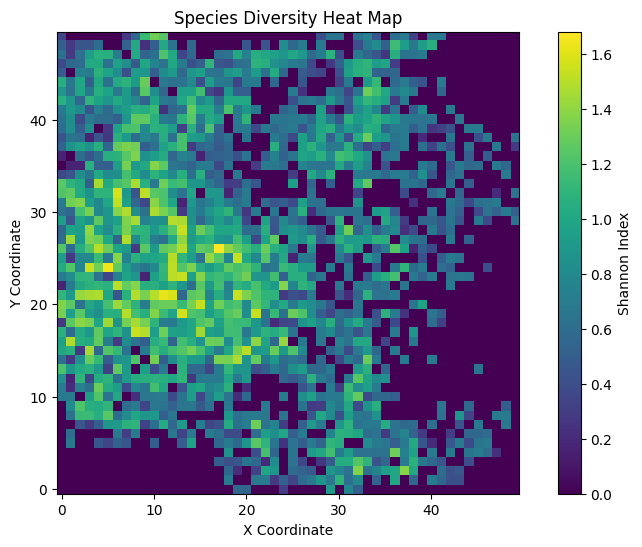

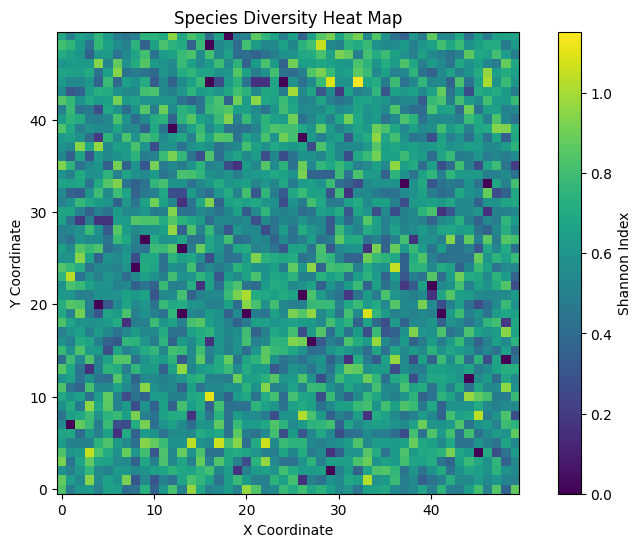

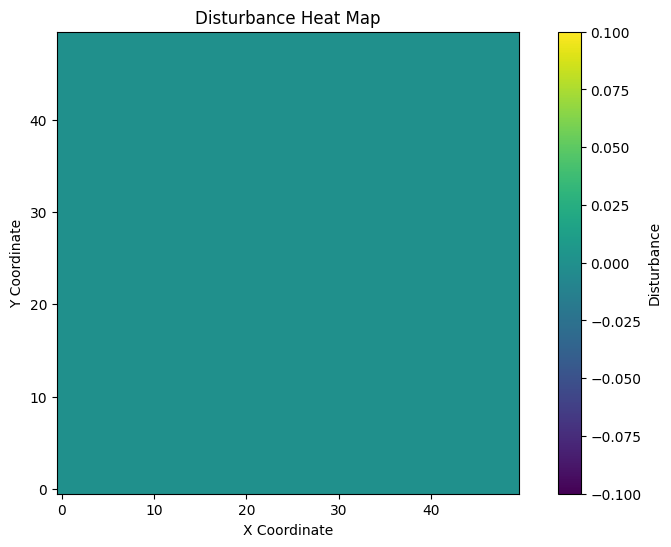

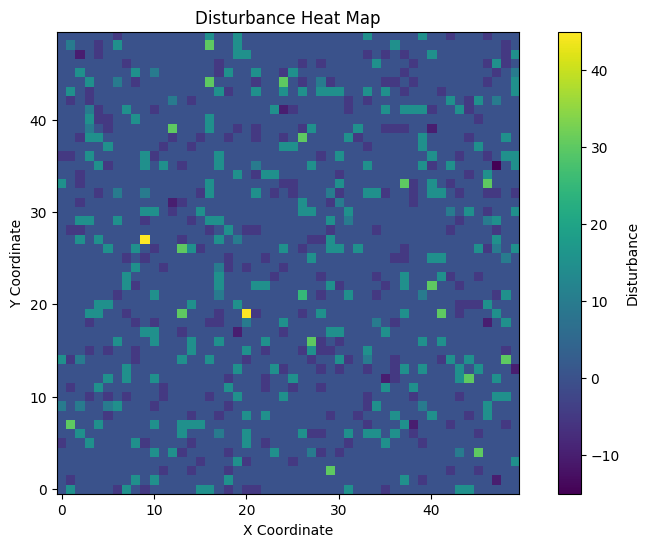

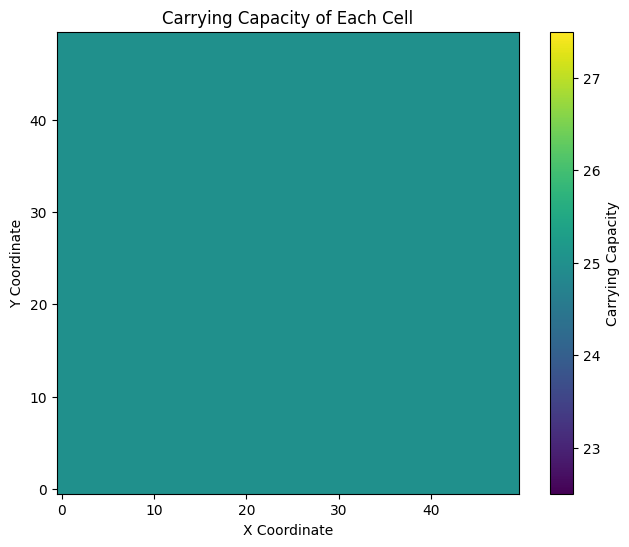

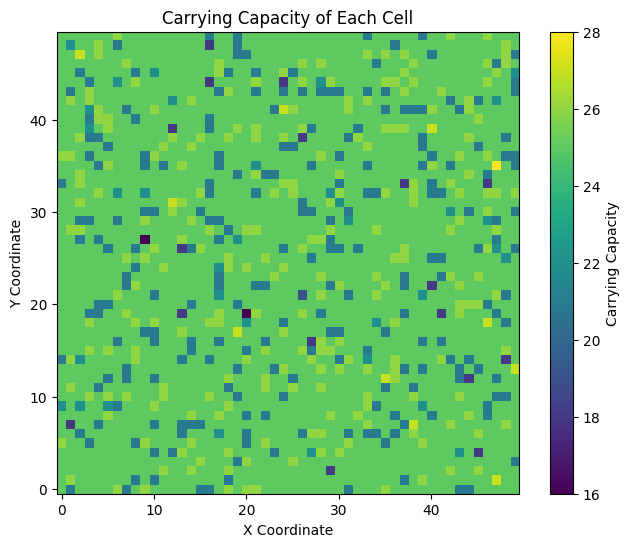

In [12]:
plot_biodiversity_map(list_cells_before)
plot_biodiversity_map(env.list_cells)

plot_disturbance_map(list_cells_before)
plot_disturbance_map(env.list_cells)

plot_carrying_capacity_map(list_cells_before)
plot_carrying_capacity_map(env.list_cells)

In [13]:
#check the corporation and investor information
env._get_obs_dict()

{'corp_0': array([1.9937355e+03, 1.4801000e+01, 4.5500002e+00, 1.2460001e+00,
        5.9975958e-01], dtype=float32),
 'corp_1': array([1.3302946e+03, 1.4732000e+01, 5.3499999e+00, 1.2460001e+00,
        5.9975958e-01], dtype=float32),
 'corp_2': array([1.772970e+03, 1.543900e+01, 4.900000e+00, 1.246000e+00,
        5.997596e-01], dtype=float32),
 'inv_0': array([0.0000000e+00, 1.5893430e-01, 2.7259803e-01, 4.1395769e-02,
        1.9937355e+03, 1.3302946e+03, 1.7729700e+03, 1.4801000e+01,
        1.4732000e+01, 1.5439000e+01], dtype=float32),
 'inv_1': array([0.0000000e+00, 4.6376190e-01, 1.3479845e-01, 4.0143967e-01,
        1.9937355e+03, 1.3302946e+03, 1.7729700e+03, 1.4801000e+01,
        1.4732000e+01, 1.5439000e+01], dtype=float32)}

## Companies do nothing

In [14]:
env = CorporateBiodiversityEnv(
    grid_size=grid_size,
    n_species=n_species,
    carrying_capacity=carrying_capacity,
    disturbance=disturbance,
    min_age=min_age,
    max_age=max_age,
    max_age_sort=max_age_sort,
    lat_steep=lat_steep,
    disp_rate=disp_rate,
    n_corporations=n_corporations,
    n_investors=n_investors,
    max_steps=max_steps,
    half=half,
    birth_first=birth_first,
    seed=seed
)

In [15]:
#get the observation information from reset
base_obs = env.reset()
list_cells_before = [copy.deepcopy(cell) for cell in env.list_cells]
# corporation: [corp.capital, corp.biodiversity_score, corp.resilience, mean_dist, mean_n_ind]
# investor: [cash, portfolio(Nc), corp_capitals(Nc), corp_biodiv(Nc)]

Max age array for each species: [10  8 10 10  8  8 10  9 10 10]
10/10 init species 0 (7679 ind.) 🌲

In [16]:
# check total number of individuals before and after dynamics
# make a copy of the list_cells to compare before and after
print("Before dynamics:")
sum_before = sum(cell.n_individuals for cell in list_cells_before)
print(f"Total individuals: {sum_before}")

Before dynamics:
Total individuals: 31250


[DEBUG] Initial available_space: [25 25 25 ... 25 25 25]
[DEBUG] births count: 31250
Step 1/1000000
Corp 0: capital=100.00, biodiv=1.000, resilience=0.000
Corp 1: capital=100.00, biodiv=1.000, resilience=0.000
Corp 2: capital=100.00, biodiv=1.000, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.000, max: 0.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62500
Step 2/1000000
Corp 0: capital=100.00, biodiv=1.000, resilience=0.000
Corp 1: capital=100.00, biodiv=1.000, resilience=0.000
Corp 2: capital=100.00, biodiv=1.000, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.000, max: 0.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62500
Step 3/1000000
Corp 0: capital=100.00, biodiv=1.000, resilience=0.000
Corp 1: capital=100.00, biodiv=1.000, resilience=0.000
Corp 2: 

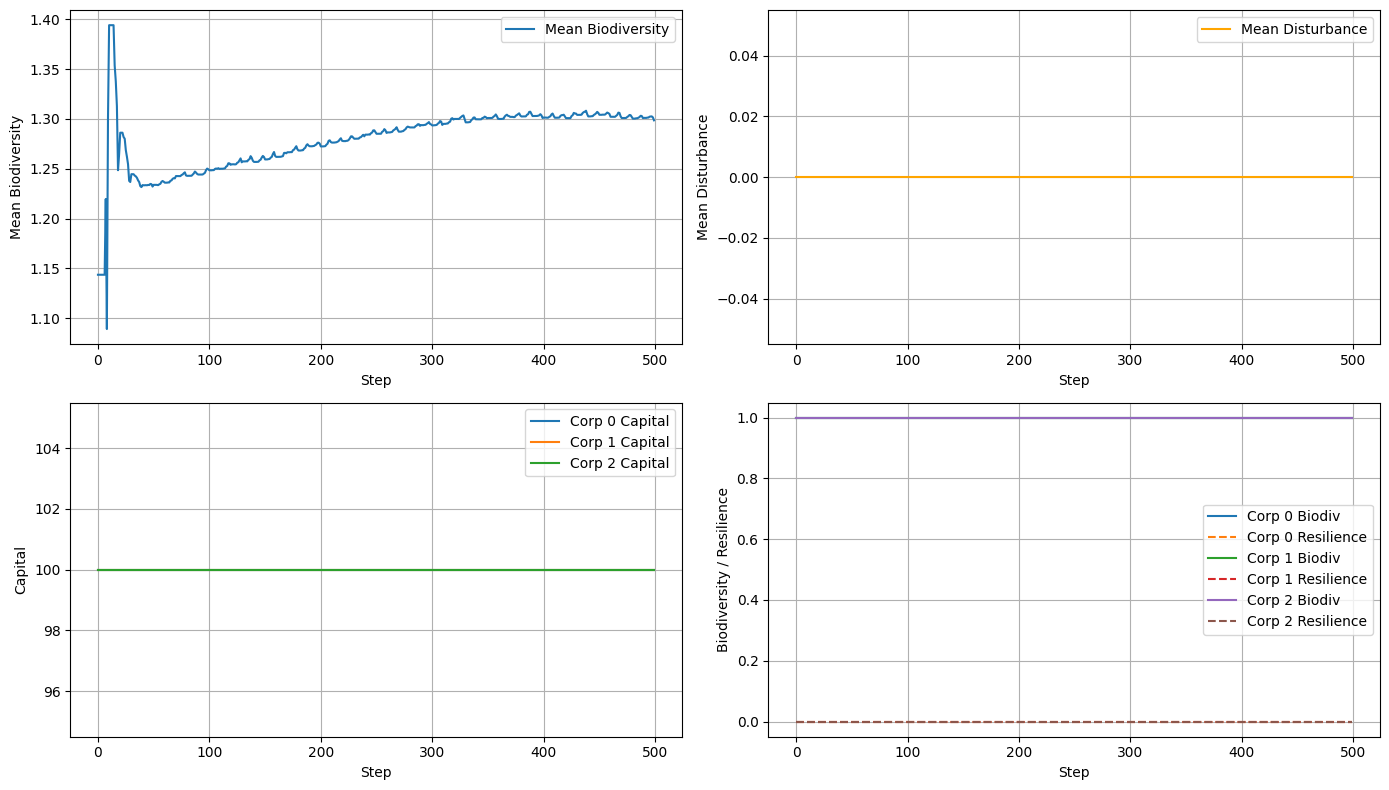

In [17]:
# record historydata
mean_biodiv_history = []
mean_disturbance_history = []

# add new：corporate attribute history
corp_capital_history = [[] for _ in range(env.n_corporations)]
corp_biodiv_history = [[] for _ in range(env.n_corporations)]
corp_resilience_history = [[] for _ in range(env.n_corporations)]

for t in range(steps):
    actions = {}
    for aid in env.corp_ids:
        actions[aid] = {
            "action_type": 0,  # 0representsnothing
            "cell": np.random.randint(env.n_cells)
        }
    for aid in env.inv_ids:
        actions[aid] = {"action_type": 0, "weights": np.zeros(env.n_corporations)}  # investorno action
    obs, rewards, dones, infos = env.step(actions)
    env.render()
    # record history
    mean_biodiv_history.append(env._get_mean_biodiversity())
    mean_disturbance_history.append(env._get_mean_disturbance())
    for i, corp in enumerate(env.corporations):
        corp_capital_history[i].append(corp.capital)
        corp_biodiv_history[i].append(corp.biodiversity_score)
        corp_resilience_history[i].append(corp.resilience)
    if all(dones.values()):
        break

# plot trend chart
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(mean_biodiv_history, label="Mean Biodiversity")
plt.xlabel("Step")
plt.ylabel("Mean Biodiversity")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(mean_disturbance_history, label="Mean Disturbance", color='orange')
plt.xlabel("Step")
plt.ylabel("Mean Disturbance")
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
for i in range(env.n_corporations):
    plt.plot(corp_capital_history[i], label=f"Corp {i} Capital")
plt.xlabel("Step")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
for i in range(env.n_corporations):
    plt.plot(corp_biodiv_history[i], label=f"Corp {i} Biodiv")
    plt.plot(corp_resilience_history[i], '--', label=f"Corp {i} Resilience")
plt.xlabel("Step")
plt.ylabel("Biodiversity / Resilience")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [18]:
print("\nAfter dynamics:")
#check total number of individuals after dynamics
sum_after = sum(cell.n_individuals for cell in env.list_cells)
print(f"Total individuals: {sum_after}")


After dynamics:
Total individuals: 62500


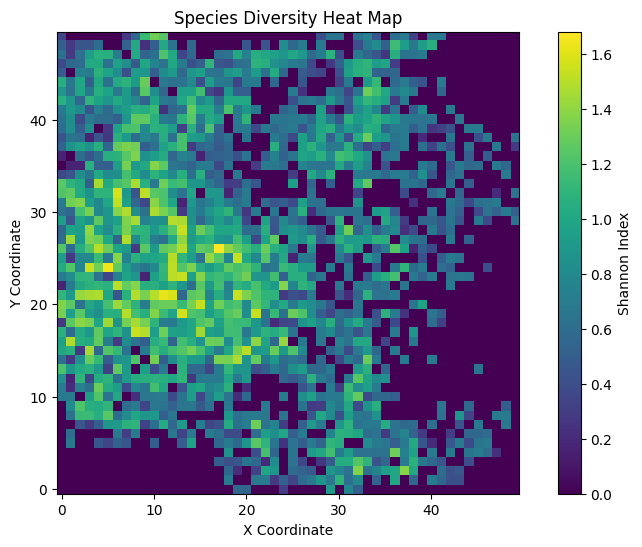

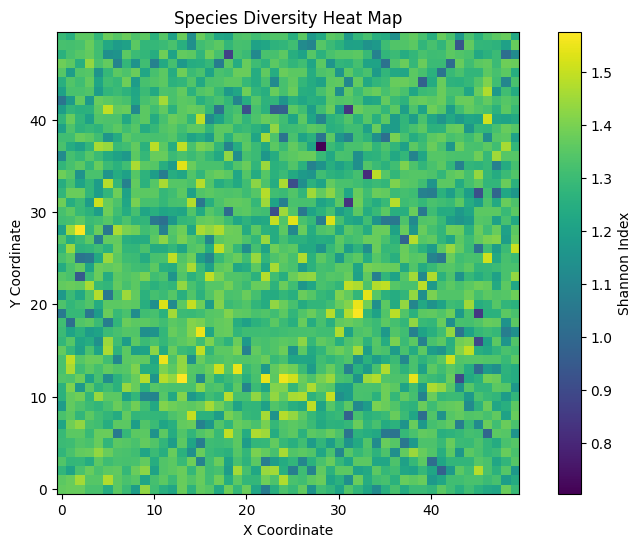

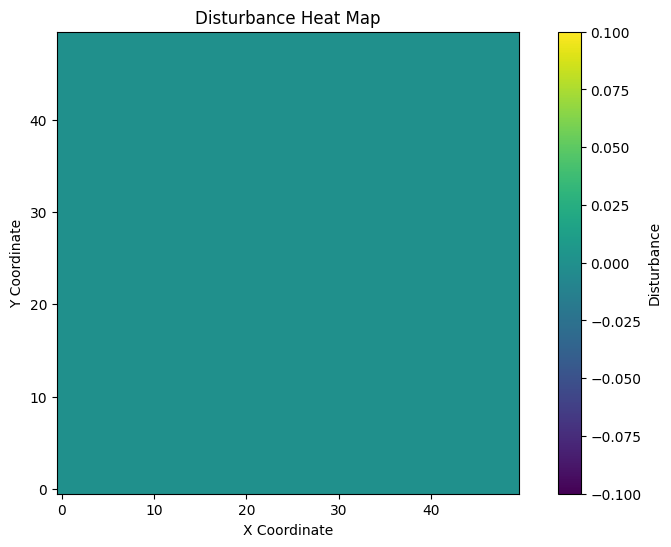

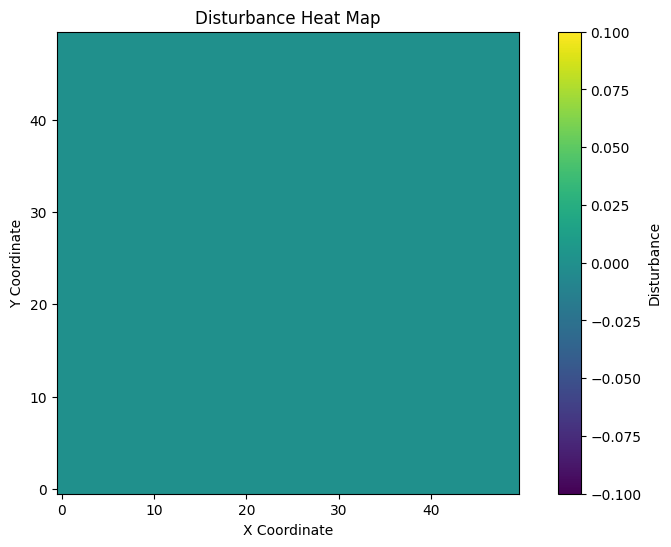

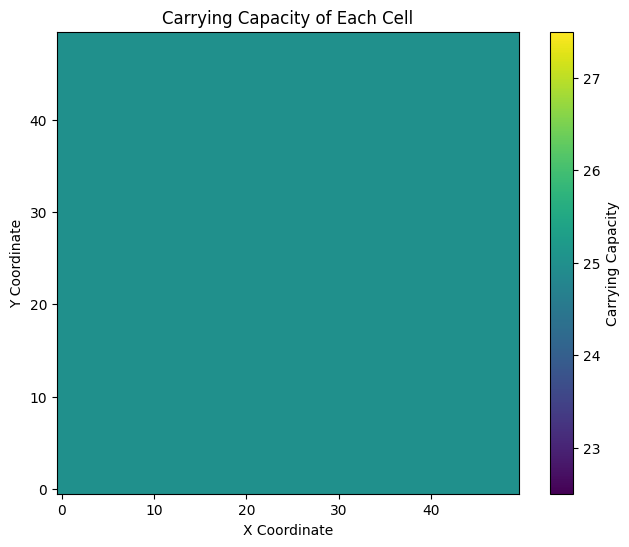

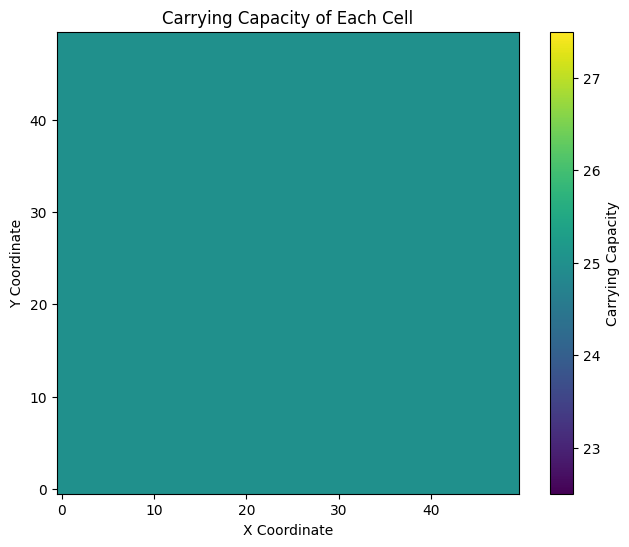

In [19]:
plot_biodiversity_map(list_cells_before)
plot_biodiversity_map(env.list_cells)

plot_disturbance_map(list_cells_before)
plot_disturbance_map(env.list_cells)

plot_carrying_capacity_map(list_cells_before)
plot_carrying_capacity_map(env.list_cells)




In [20]:
#check the corporation and investor information
env._get_obs_dict()

{'corp_0': array([100.       ,   1.       ,   0.       ,   0.       ,   1.2986579],
       dtype=float32),
 'corp_1': array([100.       ,   1.       ,   0.       ,   0.       ,   1.2986579],
       dtype=float32),
 'corp_2': array([100.       ,   1.       ,   0.       ,   0.       ,   1.2986579],
       dtype=float32),
 'inv_0': array([100.,   0.,   0.,   0., 100., 100., 100.,   1.,   1.,   1.],
       dtype=float32),
 'inv_1': array([100.,   0.,   0.,   0., 100., 100., 100.,   1.,   1.,   1.],
       dtype=float32)}

## Companies only exploit

In [21]:
env = CorporateBiodiversityEnv(
    grid_size=grid_size,
    n_species=n_species,
    carrying_capacity=carrying_capacity,
    disturbance=disturbance,
    min_age=min_age,
    max_age=max_age,
    max_age_sort=max_age_sort,
    lat_steep=lat_steep,
    disp_rate=disp_rate,
    n_corporations=n_corporations,
    n_investors=n_investors,
    max_steps=max_steps,
    half=half,
    birth_first=birth_first,
    seed=seed
)

In [22]:
#get the observation information from reset
base_obs = env.reset()
list_cells_before = [copy.deepcopy(cell) for cell in env.list_cells]
# corporation: [corp.capital, corp.biodiversity_score, corp.resilience, mean_dist, mean_n_ind]
# investor: [cash, portfolio(Nc), corp_capitals(Nc), corp_biodiv(Nc)]

Max age array for each species: [10  8 10 10  8  8 10  9 10 10]
10/10 init species 0 (7679 ind.) 🌲

In [23]:
# check total number of individuals before and after dynamics
# make a copy of the list_cells to compare before and after
print("Before dynamics:")
sum_before = sum(cell.n_individuals for cell in list_cells_before)
print(f"Total individuals: {sum_before}")

Before dynamics:
Total individuals: 31250


[DEBUG] Initial available_space: [25 25 25 ... 25 25 25]
[DEBUG] births count: 31246
Step 1/1000000
Corp 0: capital=104.00, biodiv=0.980, resilience=0.000
Corp 1: capital=100.00, biodiv=0.980, resilience=0.000
Corp 2: capital=111.00, biodiv=0.980, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.018, max: 15.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62426
Step 2/1000000
Corp 0: capital=129.00, biodiv=0.960, resilience=0.000
Corp 1: capital=125.00, biodiv=0.960, resilience=0.000
Corp 2: capital=136.00, biodiv=0.960, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.036, max: 15.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62399
Step 3/1000000
Corp 0: capital=154.00, biodiv=0.940, resilience=0.000
Corp 1: capital=150.00, biodiv=0.940, resilience=0.000
Corp 2

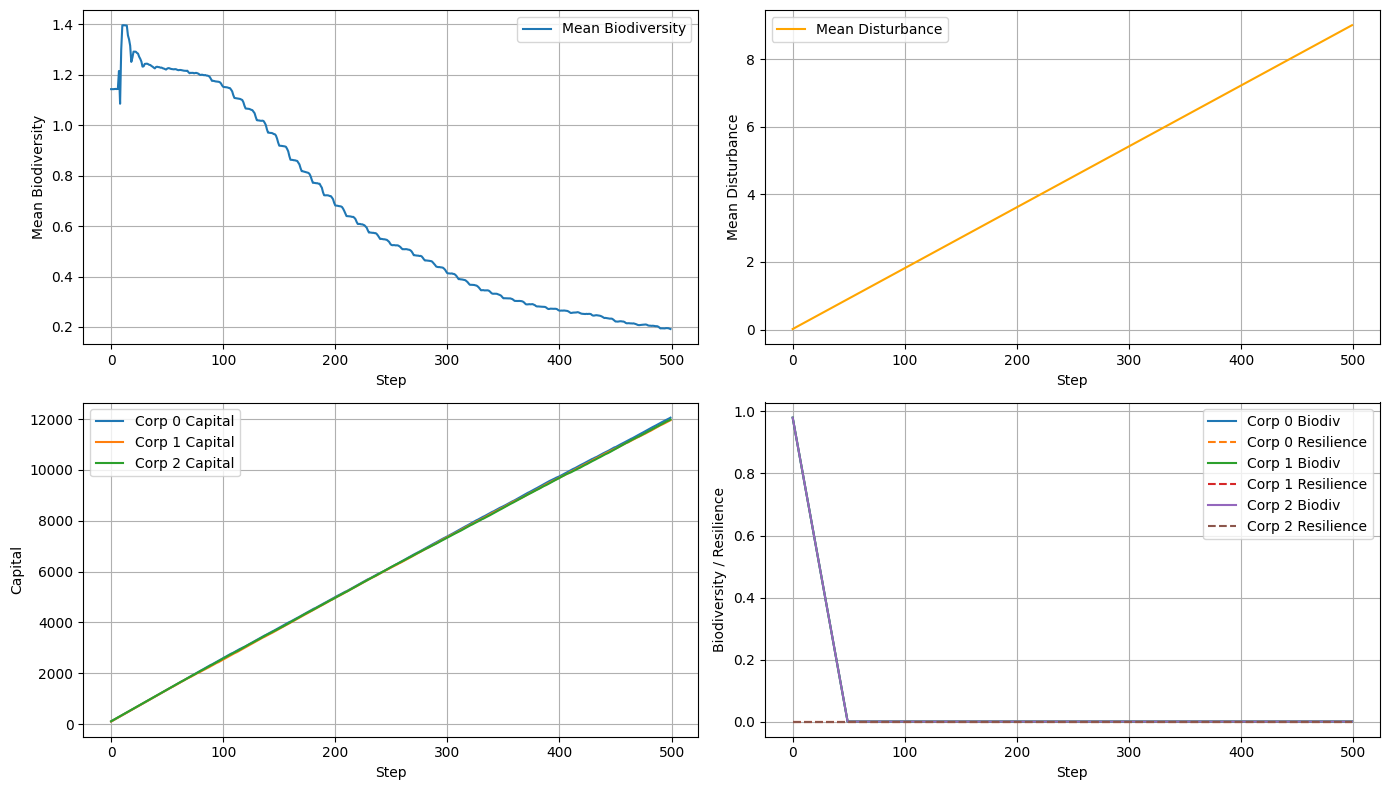

In [24]:
# record historydata
mean_biodiv_history = []
mean_disturbance_history = []

# add new：corporate attribute history
corp_capital_history = [[] for _ in range(env.n_corporations)]
corp_biodiv_history = [[] for _ in range(env.n_corporations)]
corp_resilience_history = [[] for _ in range(env.n_corporations)]

for t in range(steps):
    actions = {}
    for aid in env.corp_ids:
        actions[aid] = {
            "action_type": 1,  # 1representsEXPLOIT
            "cell": np.random.randint(env.n_cells)
        }
    for aid in env.inv_ids:
        actions[aid] = {"action_type": 0, "weights": np.zeros(env.n_corporations)}  # investorno action
    obs, rewards, dones, infos = env.step(actions)
    env.render()
    # record history
    mean_biodiv_history.append(env._get_mean_biodiversity())
    mean_disturbance_history.append(env._get_mean_disturbance())
    for i, corp in enumerate(env.corporations):
        corp_capital_history[i].append(corp.capital)
        corp_biodiv_history[i].append(corp.biodiversity_score)
        corp_resilience_history[i].append(corp.resilience)
    if all(dones.values()):
        break

# plot trend chart
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(mean_biodiv_history, label="Mean Biodiversity")
plt.xlabel("Step")
plt.ylabel("Mean Biodiversity")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(mean_disturbance_history, label="Mean Disturbance", color='orange')
plt.xlabel("Step")
plt.ylabel("Mean Disturbance")
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
for i in range(env.n_corporations):
    plt.plot(corp_capital_history[i], label=f"Corp {i} Capital")
plt.xlabel("Step")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
for i in range(env.n_corporations):
    plt.plot(corp_biodiv_history[i], label=f"Corp {i} Biodiv")
    plt.plot(corp_resilience_history[i], '--', label=f"Corp {i} Resilience")
plt.xlabel("Step")
plt.ylabel("Biodiversity / Resilience")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
print("\nAfter dynamics:")
#check total number of individuals after dynamics
sum_after = sum(cell.n_individuals for cell in env.list_cells)
print(f"Total individuals: {sum_after}")


After dynamics:
Total individuals: 56799


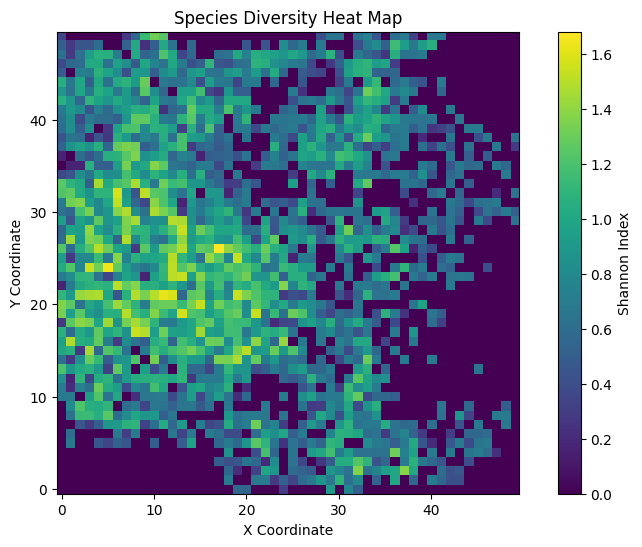

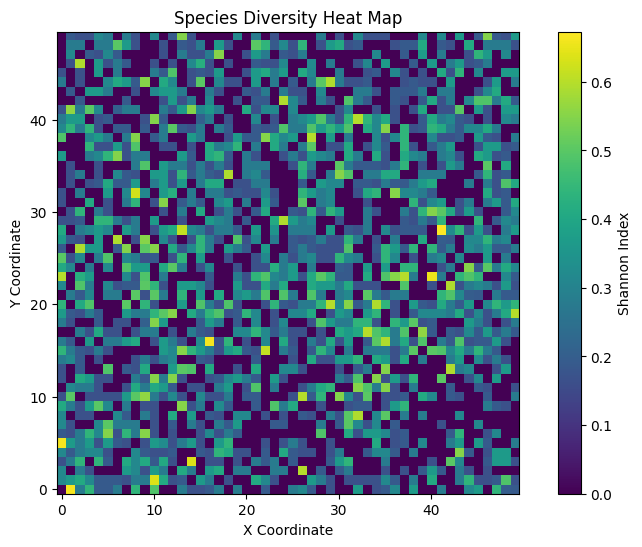

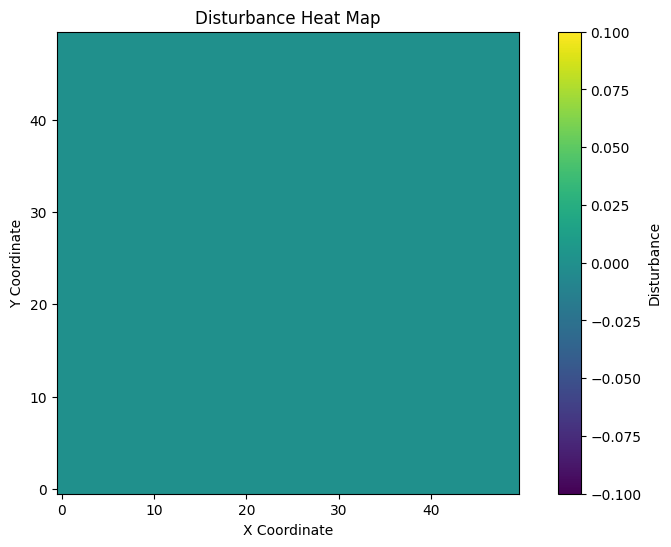

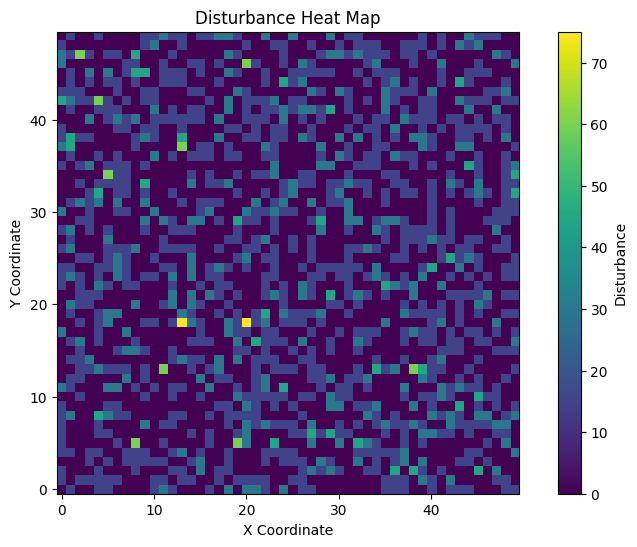

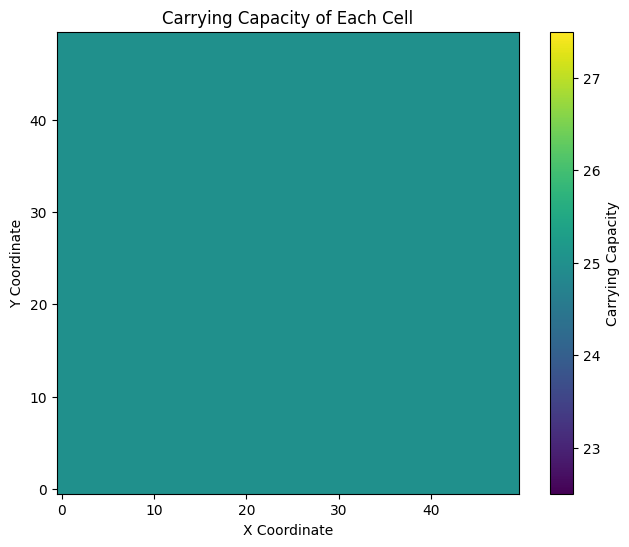

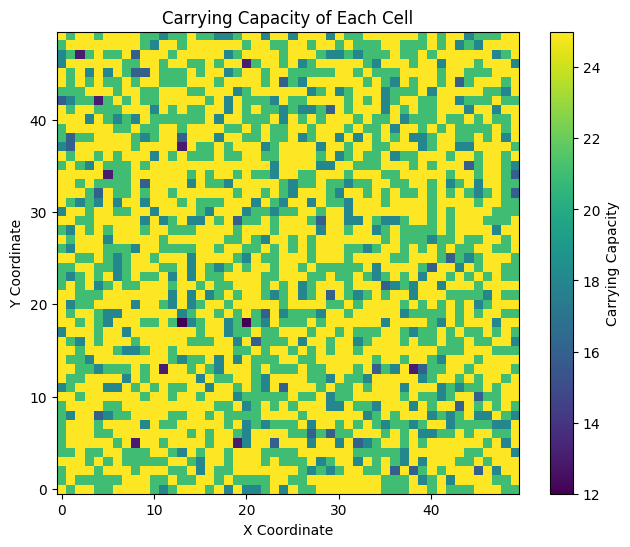

In [26]:
plot_biodiversity_map(list_cells_before)
plot_biodiversity_map(env.list_cells)

plot_disturbance_map(list_cells_before)
plot_disturbance_map(env.list_cells)

plot_carrying_capacity_map(list_cells_before)
plot_carrying_capacity_map(env.list_cells)

In [27]:
#check the corporation and investor information
env._get_obs_dict()

{'corp_0': array([1.2052000e+04, 0.0000000e+00, 0.0000000e+00, 9.0000000e+00,
        1.9181994e-01], dtype=float32),
 'corp_1': array([1.1951000e+04, 0.0000000e+00, 0.0000000e+00, 9.0000000e+00,
        1.9181994e-01], dtype=float32),
 'corp_2': array([1.1977000e+04, 0.0000000e+00, 0.0000000e+00, 9.0000000e+00,
        1.9181994e-01], dtype=float32),
 'inv_0': array([  100.,     0.,     0.,     0., 12052., 11951., 11977.,     0.,
            0.,     0.], dtype=float32),
 'inv_1': array([  100.,     0.,     0.,     0., 12052., 11951., 11977.,     0.,
            0.,     0.], dtype=float32)}

## Companies only restore

In [28]:
env = CorporateBiodiversityEnv(
    grid_size=grid_size,
    n_species=n_species,
    carrying_capacity=carrying_capacity,
    disturbance=disturbance,
    min_age=min_age,
    max_age=max_age,
    max_age_sort=max_age_sort,
    lat_steep=lat_steep,
    disp_rate=disp_rate,
    n_corporations=n_corporations,
    n_investors=n_investors,
    max_steps=max_steps,
    half=half,
    birth_first=birth_first,
    seed=seed
)

In [29]:
#get the observation information from reset
base_obs = env.reset()
list_cells_before = [copy.deepcopy(cell) for cell in env.list_cells]
# corporation: [corp.capital, corp.biodiversity_score, corp.resilience, mean_dist, mean_n_ind]
# investor: [cash, portfolio(Nc), corp_capitals(Nc), corp_biodiv(Nc)]

Max age array for each species: [10  8 10 10  8  8 10  9 10 10]
10/10 init species 0 (7679 ind.) 🌲

In [30]:
# check total number of individuals before and after dynamics
# make a copy of the list_cells to compare before and after
print("Before dynamics:")
sum_before = sum(cell.n_individuals for cell in list_cells_before)
print(f"Total individuals: {sum_before}")

Before dynamics:
Total individuals: 31250


[DEBUG] Initial available_space: [25 25 25 ... 25 25 25]
[DEBUG] births count: 31250
Step 1/1000000
Corp 0: capital=95.00, biodiv=1.010, resilience=0.000
Corp 1: capital=95.00, biodiv=1.010, resilience=0.000
Corp 2: capital=95.00, biodiv=1.010, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: -0.006, max: 0.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62500
Step 2/1000000
Corp 0: capital=90.00, biodiv=1.020, resilience=0.000
Corp 1: capital=90.00, biodiv=1.020, resilience=0.000
Corp 2: capital=90.00, biodiv=1.020, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: -0.012, max: 0.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62506
Step 3/1000000
Corp 0: capital=85.00, biodiv=1.030, resilience=0.000
Corp 1: capital=85.00, biodiv=1.030, resilience=0.000
Corp 2: capita

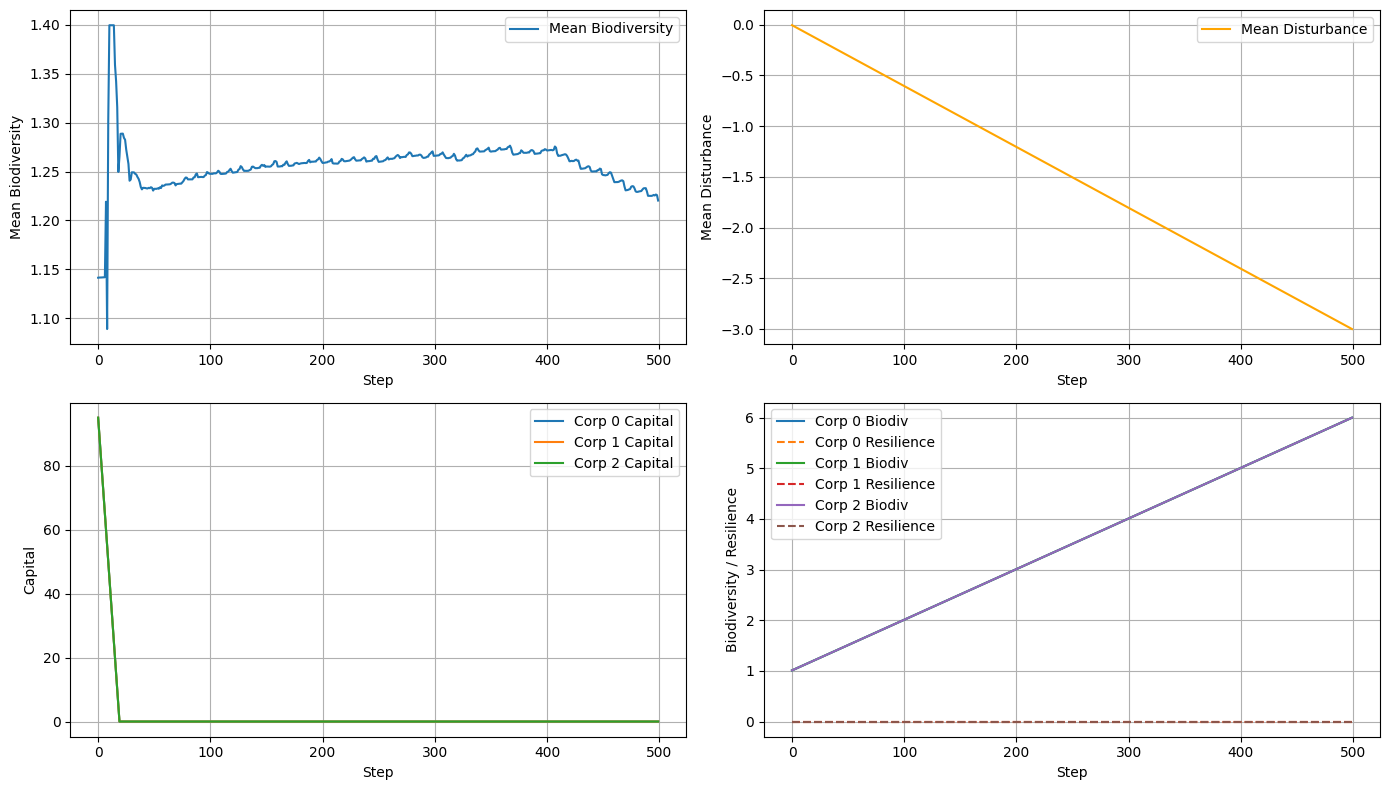

In [31]:
# record historydata
mean_biodiv_history = []
mean_disturbance_history = []

# add new：corporate attribute history
corp_capital_history = [[] for _ in range(env.n_corporations)]
corp_biodiv_history = [[] for _ in range(env.n_corporations)]
corp_resilience_history = [[] for _ in range(env.n_corporations)]

for t in range(steps):
    actions = {}
    for aid in env.corp_ids:
        actions[aid] = {
            "action_type": 2,  # 2representsRESTORE
            "cell": np.random.randint(env.n_cells)
        }
    for aid in env.inv_ids:
        actions[aid] = {"action_type": 0, "weights": np.zeros(env.n_corporations)}  # investorno action
    obs, rewards, dones, infos = env.step(actions)
    env.render()
    # record history
    mean_biodiv_history.append(env._get_mean_biodiversity())
    mean_disturbance_history.append(env._get_mean_disturbance())
    for i, corp in enumerate(env.corporations):
        corp_capital_history[i].append(corp.capital)
        corp_biodiv_history[i].append(corp.biodiversity_score)
        corp_resilience_history[i].append(corp.resilience)
    if all(dones.values()):
        break

# plot trend chart
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(mean_biodiv_history, label="Mean Biodiversity")
plt.xlabel("Step")
plt.ylabel("Mean Biodiversity")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(mean_disturbance_history, label="Mean Disturbance", color='orange')
plt.xlabel("Step")
plt.ylabel("Mean Disturbance")
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
for i in range(env.n_corporations):
    plt.plot(corp_capital_history[i], label=f"Corp {i} Capital")
plt.xlabel("Step")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
for i in range(env.n_corporations):
    plt.plot(corp_biodiv_history[i], label=f"Corp {i} Biodiv")
    plt.plot(corp_resilience_history[i], '--', label=f"Corp {i} Resilience")
plt.xlabel("Step")
plt.ylabel("Biodiversity / Resilience")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [32]:
print("\nAfter dynamics:")
#check total number of individuals after dynamics
sum_after = sum(cell.n_individuals for cell in env.list_cells)
print(f"Total individuals: {sum_after}")


After dynamics:
Total individuals: 64009


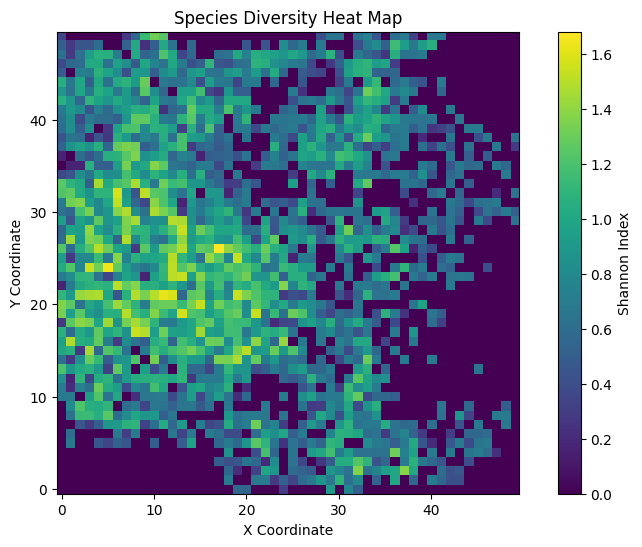

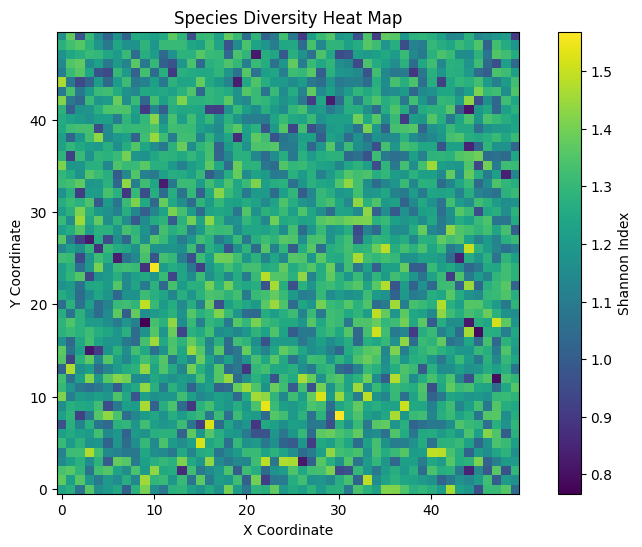

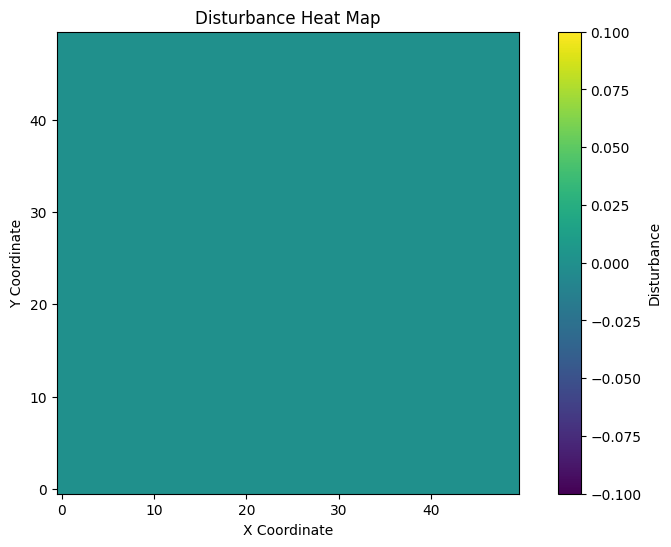

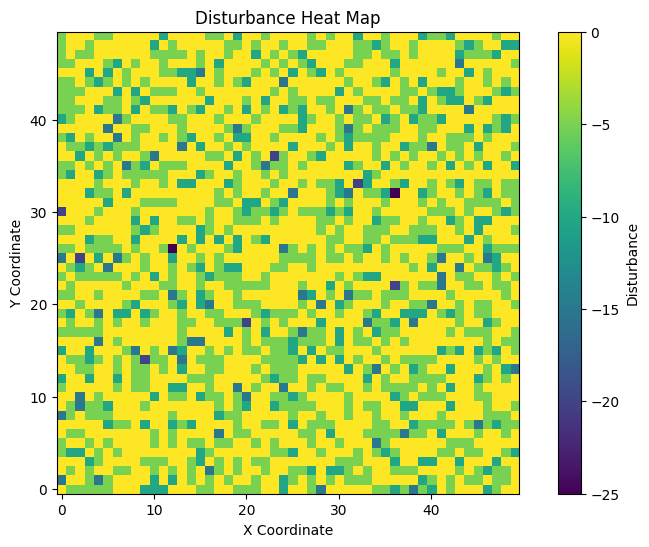

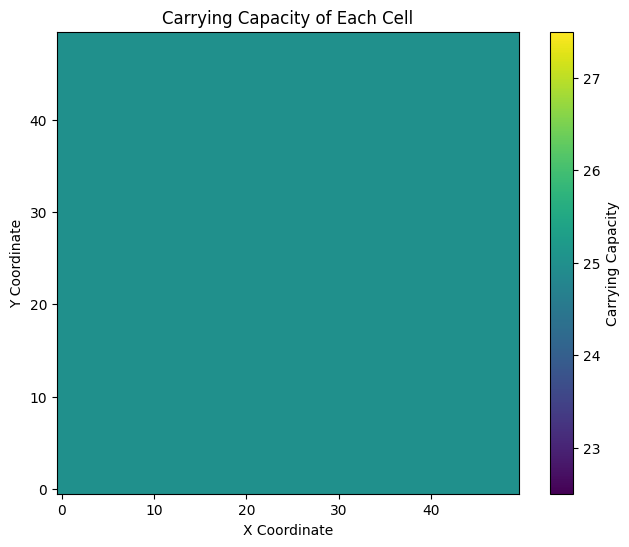

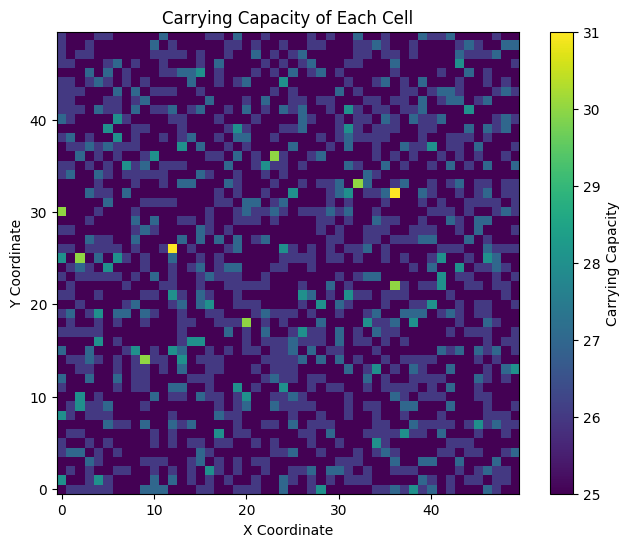

In [33]:
plot_biodiversity_map(list_cells_before)
plot_biodiversity_map(env.list_cells)

plot_disturbance_map(list_cells_before)
plot_disturbance_map(env.list_cells)

plot_carrying_capacity_map(list_cells_before)
plot_carrying_capacity_map(env.list_cells)

In [34]:
#check the corporation and investor information
env._get_obs_dict()

{'corp_0': array([ 0.       ,  6.       ,  0.       , -3.       ,  1.2203296],
       dtype=float32),
 'corp_1': array([ 0.       ,  6.       ,  0.       , -3.       ,  1.2203296],
       dtype=float32),
 'corp_2': array([ 0.       ,  6.       ,  0.       , -3.       ,  1.2203296],
       dtype=float32),
 'inv_0': array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   6.,   6.,   6.],
       dtype=float32),
 'inv_1': array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   6.,   6.,   6.],
       dtype=float32)}

## Companies only green wash

In [35]:
env = CorporateBiodiversityEnv(
    grid_size=grid_size,
    n_species=n_species,
    carrying_capacity=carrying_capacity,
    disturbance=disturbance,
    min_age=min_age,
    max_age=max_age,
    max_age_sort=max_age_sort,
    lat_steep=lat_steep,
    disp_rate=disp_rate,
    n_corporations=n_corporations,
    n_investors=n_investors,
    max_steps=max_steps,
    half=half,
    birth_first=birth_first,
    seed=seed
)

In [36]:
#get the observation information from reset
base_obs = env.reset()
list_cells_before = [copy.deepcopy(cell) for cell in env.list_cells]
# corporation: [corp.capital, corp.biodiversity_score, corp.resilience, mean_dist, mean_n_ind]
# investor: [cash, portfolio(Nc), corp_capitals(Nc), corp_biodiv(Nc)]

Max age array for each species: [10  8 10 10  8  8 10  9 10 10]
10/10 init species 0 (7679 ind.) 🌲

In [37]:
# check total number of individuals before and after dynamics
# make a copy of the list_cells to compare before and after
print("Before dynamics:")
sum_before = sum(cell.n_individuals for cell in list_cells_before)
print(f"Total individuals: {sum_before}")

Before dynamics:
Total individuals: 31250


[DEBUG] Initial available_space: [25 25 25 ... 25 25 25]
[DEBUG] births count: 31250
Step 1/1000000
Corp 0: capital=98.00, biodiv=1.100, resilience=0.000
Corp 1: capital=98.00, biodiv=1.100, resilience=0.000
Corp 2: capital=98.00, biodiv=1.100, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.000, max: 0.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62500
Step 2/1000000
Corp 0: capital=96.00, biodiv=1.200, resilience=0.000
Corp 1: capital=96.00, biodiv=1.200, resilience=0.000
Corp 2: capital=96.00, biodiv=1.200, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.000, max: 0.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62500
Step 3/1000000
Corp 0: capital=94.00, biodiv=1.300, resilience=0.000
Corp 1: capital=94.00, biodiv=1.300, resilience=0.000
Corp 2: capital=

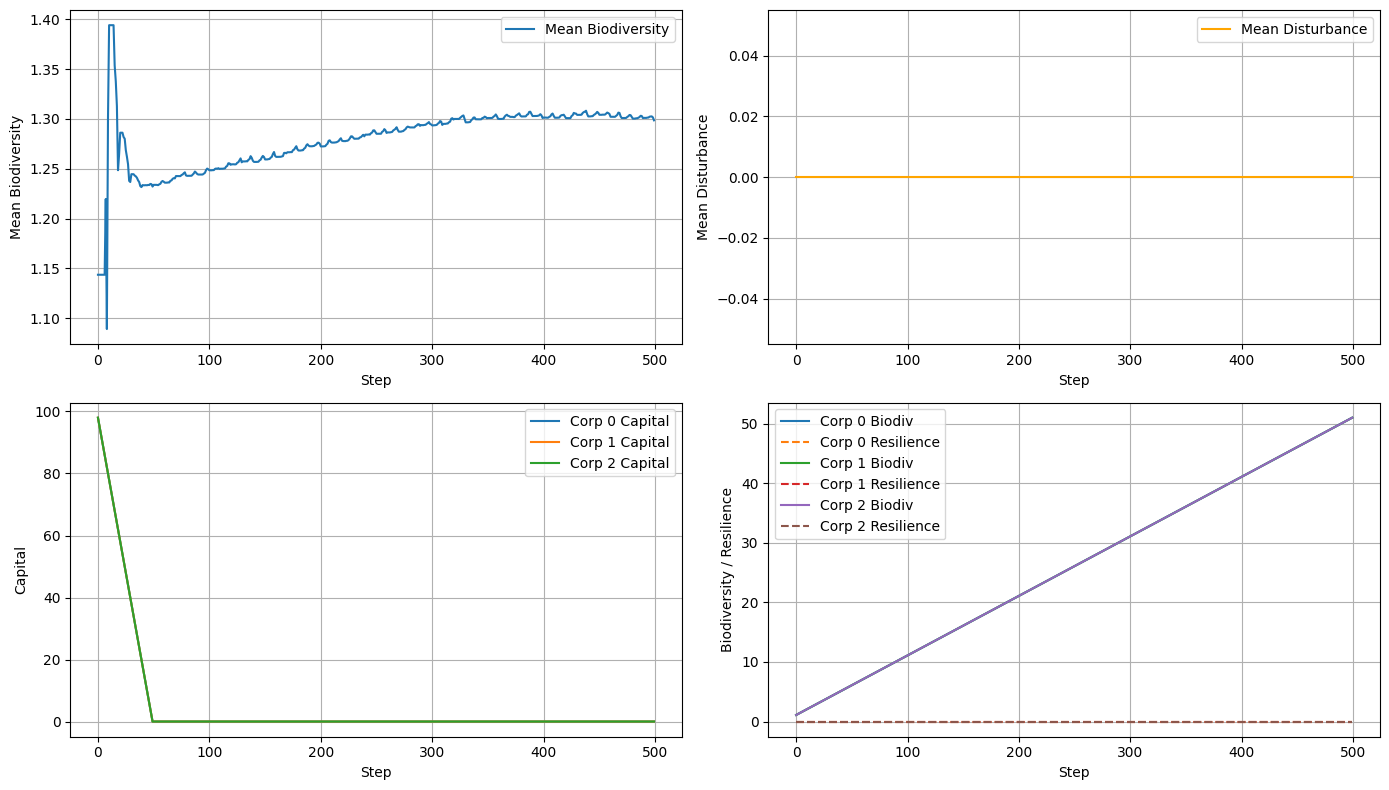

In [38]:
# record historydata
mean_biodiv_history = []
mean_disturbance_history = []

# add new：corporate attribute history
corp_capital_history = [[] for _ in range(env.n_corporations)]
corp_biodiv_history = [[] for _ in range(env.n_corporations)]
corp_resilience_history = [[] for _ in range(env.n_corporations)]

for t in range(steps):
    actions = {}
    for aid in env.corp_ids:
        actions[aid] = {
            "action_type": 3,  # 3representsEXPLOIT
            "cell": np.random.randint(env.n_cells)
        }
    for aid in env.inv_ids:
        actions[aid] = {"action_type": 0, "weights": np.zeros(env.n_corporations)}  # investorno action
    obs, rewards, dones, infos = env.step(actions)
    env.render()
    # record history
    mean_biodiv_history.append(env._get_mean_biodiversity())
    mean_disturbance_history.append(env._get_mean_disturbance())
    for i, corp in enumerate(env.corporations):
        corp_capital_history[i].append(corp.capital)
        corp_biodiv_history[i].append(corp.biodiversity_score)
        corp_resilience_history[i].append(corp.resilience)
    if all(dones.values()):
        break

# plot trend chart
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(mean_biodiv_history, label="Mean Biodiversity")
plt.xlabel("Step")
plt.ylabel("Mean Biodiversity")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(mean_disturbance_history, label="Mean Disturbance", color='orange')
plt.xlabel("Step")
plt.ylabel("Mean Disturbance")
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
for i in range(env.n_corporations):
    plt.plot(corp_capital_history[i], label=f"Corp {i} Capital")
plt.xlabel("Step")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
for i in range(env.n_corporations):
    plt.plot(corp_biodiv_history[i], label=f"Corp {i} Biodiv")
    plt.plot(corp_resilience_history[i], '--', label=f"Corp {i} Resilience")
plt.xlabel("Step")
plt.ylabel("Biodiversity / Resilience")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [39]:
print("\nAfter dynamics:")
#check total number of individuals after dynamics
sum_after = sum(cell.n_individuals for cell in env.list_cells)
print(f"Total individuals: {sum_after}")


After dynamics:
Total individuals: 62500


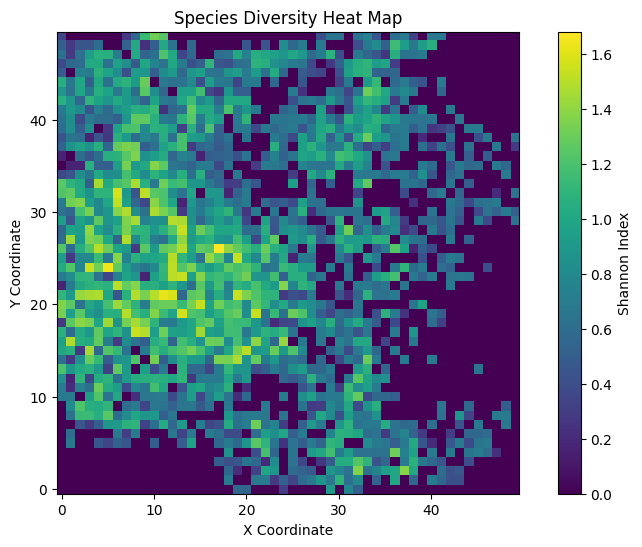

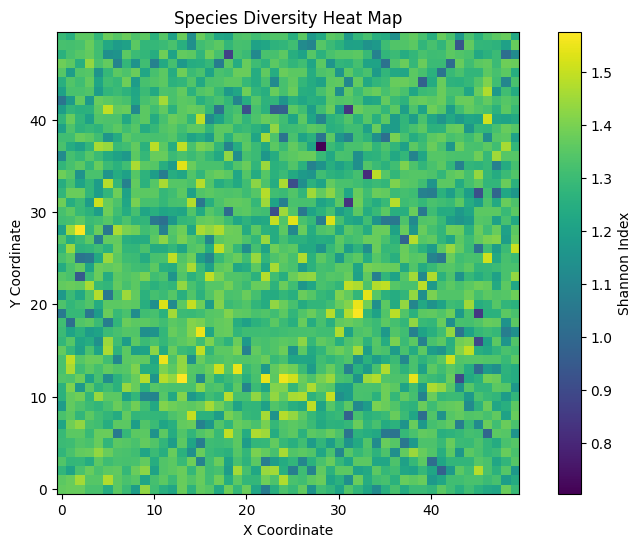

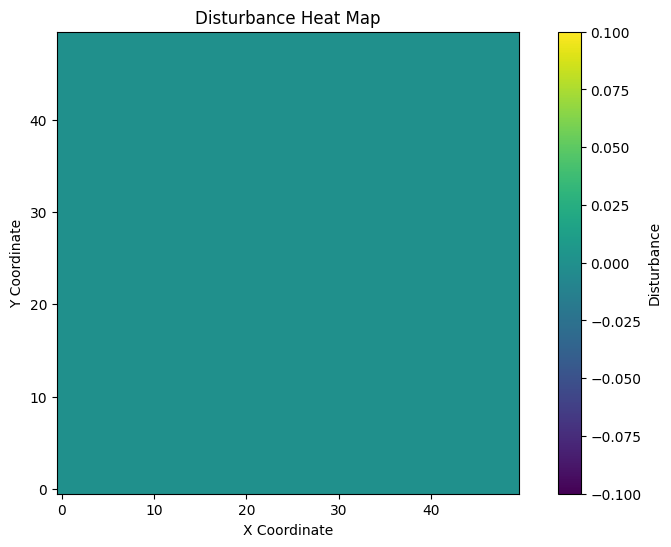

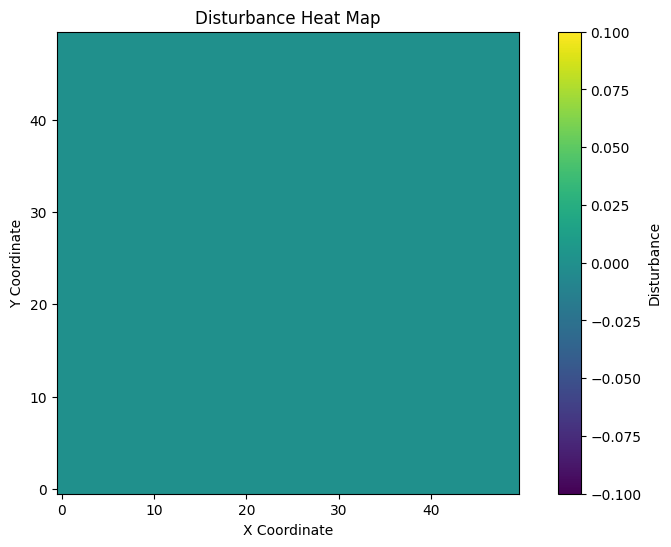

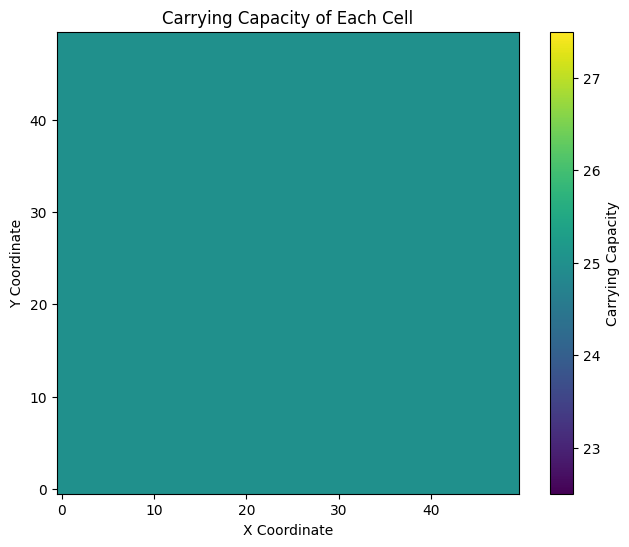

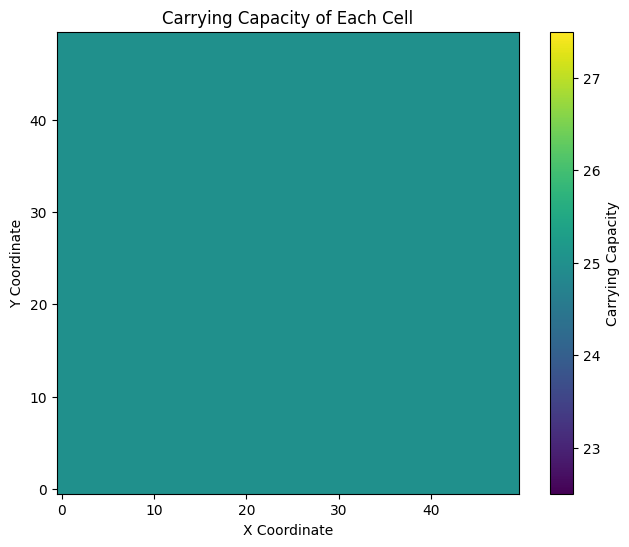

In [40]:
plot_biodiversity_map(list_cells_before)
plot_biodiversity_map(env.list_cells)

plot_disturbance_map(list_cells_before)
plot_disturbance_map(env.list_cells)

plot_carrying_capacity_map(list_cells_before)
plot_carrying_capacity_map(env.list_cells)

In [41]:
#check the corporation and investor information
env._get_obs_dict()

{'corp_0': array([ 0.       , 51.       ,  0.       ,  0.       ,  1.2986579],
       dtype=float32),
 'corp_1': array([ 0.       , 51.       ,  0.       ,  0.       ,  1.2986579],
       dtype=float32),
 'corp_2': array([ 0.       , 51.       ,  0.       ,  0.       ,  1.2986579],
       dtype=float32),
 'inv_0': array([100.,   0.,   0.,   0.,   0.,   0.,   0.,  51.,  51.,  51.],
       dtype=float32),
 'inv_1': array([100.,   0.,   0.,   0.,   0.,   0.,   0.,  51.,  51.,  51.],
       dtype=float32)}

## Companies exploit then restore

In [42]:
env = CorporateBiodiversityEnv(
    grid_size=grid_size,
    n_species=n_species,
    carrying_capacity=carrying_capacity,
    disturbance=disturbance,
    min_age=min_age,
    max_age=max_age,
    max_age_sort=max_age_sort,
    lat_steep=lat_steep,
    disp_rate=disp_rate,
    n_corporations=n_corporations,
    n_investors=n_investors,
    max_steps=max_steps,
    half=half,
    birth_first=birth_first,
    seed=seed
)

In [43]:
#get the observation information from reset
base_obs = env.reset()
list_cells_before = [copy.deepcopy(cell) for cell in env.list_cells]
# corporation: [corp.capital, corp.biodiversity_score, corp.resilience, mean_dist, mean_n_ind]
# investor: [cash, portfolio(Nc), corp_capitals(Nc), corp_biodiv(Nc)]

Max age array for each species: [10  8 10 10  8  8 10  9 10 10]
10/10 init species 0 (7679 ind.) 🌲

In [44]:
# check total number of individuals before and after dynamics
# make a copy of the list_cells to compare before and after
print("Before dynamics:")
sum_before = sum(cell.n_individuals for cell in list_cells_before)
print(f"Total individuals: {sum_before}")

Before dynamics:
Total individuals: 31250


[DEBUG] Initial available_space: [25 25 25 ... 25 25 25]
[DEBUG] births count: 31246
Step 1/1000000
Corp 0: capital=104.00, biodiv=0.980, resilience=0.000
Corp 1: capital=100.00, biodiv=0.980, resilience=0.000
Corp 2: capital=111.00, biodiv=0.980, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.018, max: 15.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62426
Step 2/1000000
Corp 0: capital=129.00, biodiv=0.960, resilience=0.000
Corp 1: capital=125.00, biodiv=0.960, resilience=0.000
Corp 2: capital=136.00, biodiv=0.960, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.036, max: 15.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62399
Step 3/1000000
Corp 0: capital=154.00, biodiv=0.940, resilience=0.000
Corp 1: capital=150.00, biodiv=0.940, resilience=0.000
Corp 2

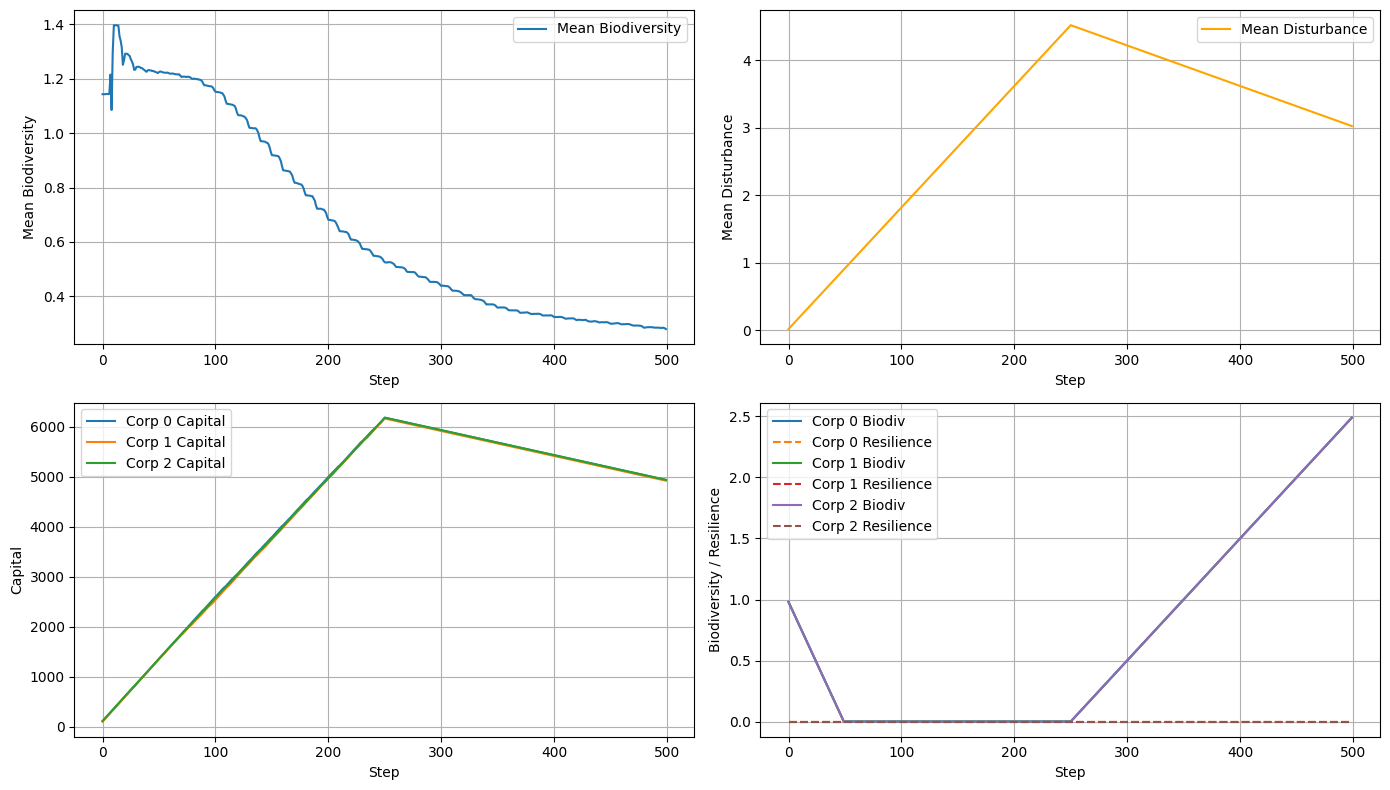

In [45]:
# record historydata
mean_biodiv_history = []
mean_disturbance_history = []

# add new：corporate attribute history
corp_capital_history = [[] for _ in range(env.n_corporations)]
corp_biodiv_history = [[] for _ in range(env.n_corporations)]
corp_resilience_history = [[] for _ in range(env.n_corporations)]

for t in range(steps):
    actions = {}
    for aid in env.corp_ids:
        if t <= steps // 2:
            actions[aid] = {
                "action_type": 1,  # 1representsEXPLOIT
                "cell": np.random.randint(env.n_cells)
            }
        else:
            actions[aid] = {
                "action_type": 2,  # 2representsRESTORE
                "cell": np.random.randint(env.n_cells)
            }
    for aid in env.inv_ids:
        actions[aid] = {"action_type": 0, "weights": np.zeros(env.n_corporations)}  # investorno action
    obs, rewards, dones, infos = env.step(actions)
    env.render()
    # record history
    mean_biodiv_history.append(env._get_mean_biodiversity())
    mean_disturbance_history.append(env._get_mean_disturbance())
    for i, corp in enumerate(env.corporations):
        corp_capital_history[i].append(corp.capital)
        corp_biodiv_history[i].append(corp.biodiversity_score)
        corp_resilience_history[i].append(corp.resilience)
    if all(dones.values()):
        break

# plot trend chart
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(mean_biodiv_history, label="Mean Biodiversity")
plt.xlabel("Step")
plt.ylabel("Mean Biodiversity")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(mean_disturbance_history, label="Mean Disturbance", color='orange')
plt.xlabel("Step")
plt.ylabel("Mean Disturbance")
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
for i in range(env.n_corporations):
    plt.plot(corp_capital_history[i], label=f"Corp {i} Capital")
plt.xlabel("Step")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
for i in range(env.n_corporations):
    plt.plot(corp_biodiv_history[i], label=f"Corp {i} Biodiv")
    plt.plot(corp_resilience_history[i], '--', label=f"Corp {i} Resilience")
plt.xlabel("Step")
plt.ylabel("Biodiversity / Resilience")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [46]:
print("\nAfter dynamics:")
#check total number of individuals after dynamics
sum_after = sum(cell.n_individuals for cell in env.list_cells)
print(f"Total individuals: {sum_after}")


After dynamics:
Total individuals: 60322


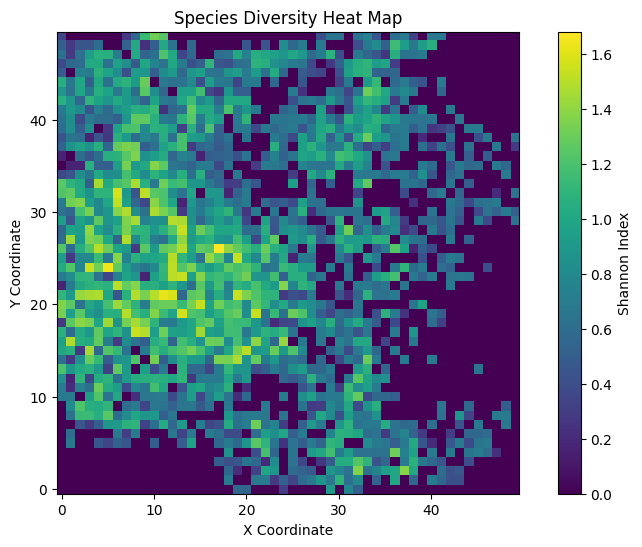

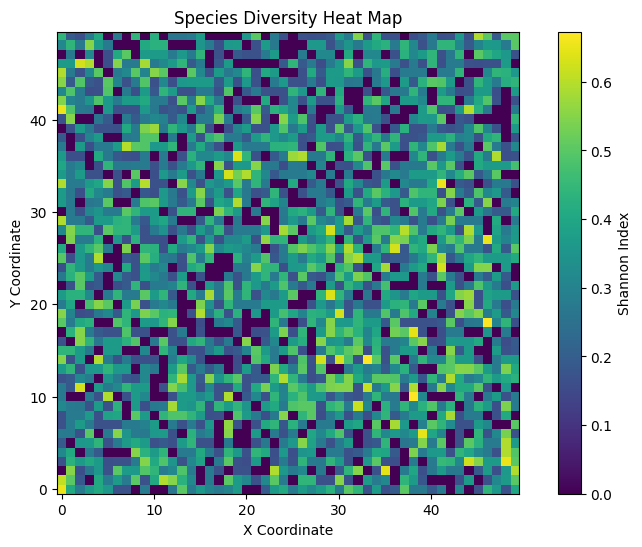

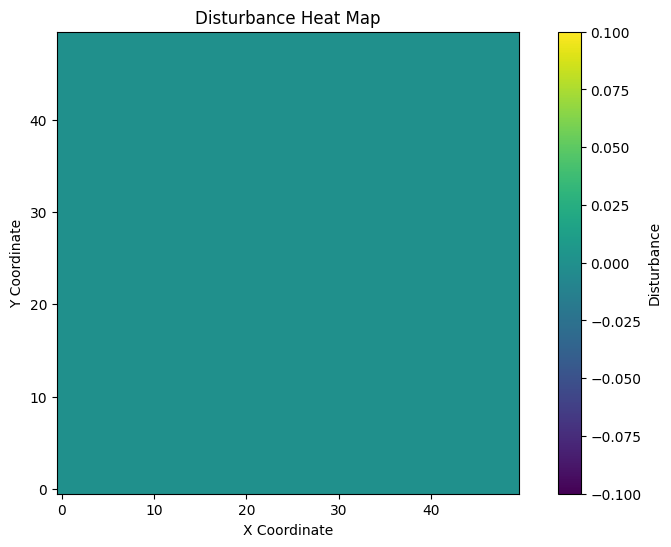

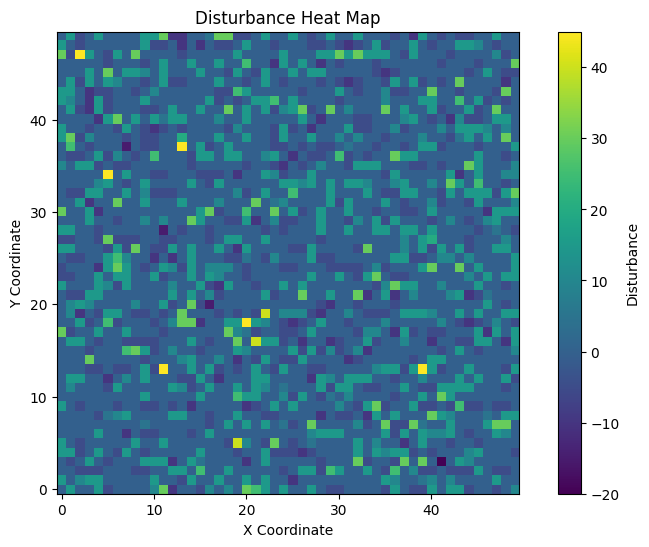

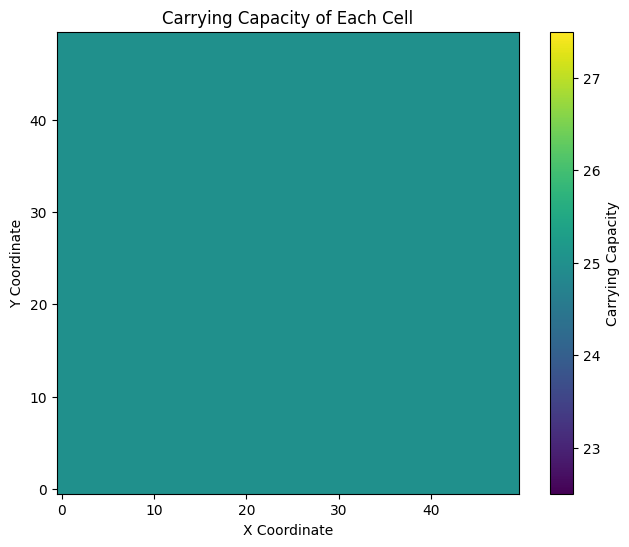

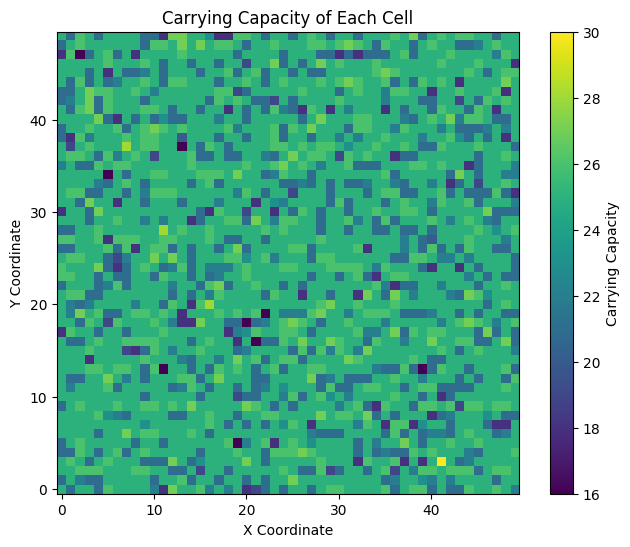

In [47]:
plot_biodiversity_map(list_cells_before)
plot_biodiversity_map(env.list_cells)

plot_disturbance_map(list_cells_before)
plot_disturbance_map(env.list_cells)

plot_carrying_capacity_map(list_cells_before)
plot_carrying_capacity_map(env.list_cells)

In [48]:
#check the corporation and investor information
env._get_obs_dict()

{'corp_0': array([4.9370000e+03, 2.4900000e+00, 0.0000000e+00, 3.0239999e+00,
        2.8004876e-01], dtype=float32),
 'corp_1': array([4.9210000e+03, 2.4900000e+00, 0.0000000e+00, 3.0239999e+00,
        2.8004876e-01], dtype=float32),
 'corp_2': array([4.9370000e+03, 2.4900000e+00, 0.0000000e+00, 3.0239999e+00,
        2.8004876e-01], dtype=float32),
 'inv_0': array([1.000e+02, 0.000e+00, 0.000e+00, 0.000e+00, 4.937e+03, 4.921e+03,
        4.937e+03, 2.490e+00, 2.490e+00, 2.490e+00], dtype=float32),
 'inv_1': array([1.000e+02, 0.000e+00, 0.000e+00, 0.000e+00, 4.937e+03, 4.921e+03,
        4.937e+03, 2.490e+00, 2.490e+00, 2.490e+00], dtype=float32)}